In [167]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import math

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [168]:
pd.set_option('display.max_columns', None)

# Импорт данных

In [169]:
df_domclick = pd.read_csv("domclick/Казань_domclick_dataset.csv", sep = ";")
df_domclick.info()
df_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             2297 non-null   int64  
 1   region                         2297 non-null   object 
 2   address                        2297 non-null   object 
 3   latitude                       2297 non-null   float64
 4   longitude                      2297 non-null   float64
 5   price                          2297 non-null   int64  
 6   house_floors                   2297 non-null   int64  
 7   house_buildYear                2297 non-null   object 
 8   house_ceilingHeight            2297 non-null   object 
 9   house_hasGarbageDisposer       1087 non-null   object 
 10  house_liftsFreight             775 non-null    float64
 11  house_liftsPassenger           1248 non-null   float64
 12  house_wallType                 2216 non-null   o

,id,region,address,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaCommonPropery,house_areaNonResidential,house_areaResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,saleType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation,objectInfo_loggias
0,1914113477,Казань,"Безоблачная улица, 3",55.71143,49.18580,8390000,5,2014,2.7,False,0.00000,0.00000,Кирпичный,0,190.7,1818.9,440.8,NaN,Центральное,1,Центральное,NaN,C,2,Автоматическая,Железобетонный,Сплошной,Центральное,0,0,Центральное,Вытяжная,Свободная продажа,1,41.60000,12.30000,0.00000,3,1,0,0,True,Евро,NaN
1,1893940539,Казань,"улица Мансура Хасанова, 13А",55.78034,49.18450,6900000,20,2023,2.7,False,0.00000,3.00000,Монолитно-кирпичный,29.8,NaN,14013.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,1,35.00000,12.00000,13.00000,17,1,0,1,False,Без ремонта,NaN
2,1894012244,Казань,"улица Рихарда Зорге, 34",55.75443,49.19347,8700000,9,2001,2.8,True,0.00000,2.00000,Кирпичный,2412.4,2412.4,11358.9,1200,3,Центральное,1,Центральное,3,Не присвоен,3,Пожарные гидранты,Железобетонный,NaN,Центральное,400,0,Центральное,Приточно-вытяжная,Свободная продажа,1,47.00000,9.00000,24.00000,9,0,1,1,True,Косметический,NaN
3,1833200268,Казань,"улица Ярышлар, 2А",55.68091,49.20004,5040000,20,2021,undefined,NaN,NaN,NaN,Блочный,31.1,NaN,7275.3,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,undefined,1,39.10000,12.30000,0.00000,4,undefined,undefined,1,NaN,undefined,NaN
4,1894690548,Казань,"Берёзовая улица, 29",55.71191,49.18455,10500000,6,2013,2.7,False,0.00000,NaN,Кирпичный,70,NaN,1338.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2,73.30000,12.00000,0.00000,5,undefined,undefined,0,True,undefined,NaN


In [170]:
df_cian = pd.read_csv("cian/data_home_Kazan.csv")
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12660 entries, 0 to 12659
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 12660 non-null  object 
 1   price                12660 non-null  int64  
 2   price_for_metr       12660 non-null  int64  
 3   floor_object         12660 non-null  int64  
 4   total_floors         12660 non-null  int64  
 5   type_of_home         12660 non-null  object 
 6   square_home          12660 non-null  float64
 7   live_square          12660 non-null  object 
 8   kitchen_square       12660 non-null  object 
 9   height_ceiling       12660 non-null  object 
 10  bathroom             12660 non-null  object 
 11  balcony              12660 non-null  object 
 12  repair               12660 non-null  object 
 13  yer_home             12660 non-null  object 
 14  garbage_chute        12660 non-null  object 
 15  type_home            12660 non-null 

In [171]:
df_cian.head()

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link
0,Студия,1100000,88710,5,5,Вторичка,12.40000,Null,Null,Null,Null,1,Косметический,1963,Null,Кирпичный,Железобетонные,3,Центральное,Нет,Центральное,Null,Null,"Татарстан респ., Казань, р-н Московский, мкр. ...",https://kazan.cian.ru/sale/flat/293397918/
1,Студия,1570000,127642,3,5,Вторичка,12.30000,4.3,3.0,2.6,Null,Null,Null,1963,Null,Кирпичный,Железобетонные,3,Центральное,Нет,Центральное,Null,Null,"Татарстан респ., Казань, р-н Советский, мкр. к...",https://kazan.cian.ru/sale/flat/292022960/
2,1-комн. квартира,1550000,77500,3,3,Вторичка,20.00000,11.0,4.0,Null,1,1,Без ремонта,1957,Null,Кирпичный,Нет информации,3,Центральное,Нет,Центральное,Null,Null,"Татарстан респ., Казань, р-н Приволжский, мкр....",https://kazan.cian.ru/sale/flat/293929753/
3,1-комн. квартира,1400000,67961,1,3,Вторичка,20.60000,10.6,5.0,0.0,Null,Null,Null,Null,Null,Деревянный,Null,Null,Null,Null,Null,Null,Null,"Татарстан респ., Казань, р-н Кировский, мкр. Я...",https://kazan.cian.ru/sale/flat/293012675/
4,1-комн. квартира,1499000,128120,2,2,Вторичка,11.70000,1.7,5.0,0.0,Null,Null,Null,1932,Null,Кирпичный,Деревянные,3,Центральное,Нет,Центральное,Null,Null,"Татарстан респ., Казань, р-н Кировский, мкр. П...",https://kazan.cian.ru/sale/flat/289216015/


# Подготовка данных

In [172]:
df_domclick = df_domclick.replace('undefined', np.nan)
df_domclick['objectInfo_kitchenArea'] = df_domclick['objectInfo_kitchenArea'].replace(0, np.nan)
df_domclick['objectInfo_livingArea'] = df_domclick['objectInfo_livingArea'].replace(0, np.nan)

In [173]:
df_domclick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             2297 non-null   int64  
 1   region                         2297 non-null   object 
 2   address                        2297 non-null   object 
 3   latitude                       2297 non-null   float64
 4   longitude                      2297 non-null   float64
 5   price                          2297 non-null   int64  
 6   house_floors                   2297 non-null   int64  
 7   house_buildYear                2279 non-null   object 
 8   house_ceilingHeight            594 non-null    object 
 9   house_hasGarbageDisposer       1087 non-null   object 
 10  house_liftsFreight             775 non-null    float64
 11  house_liftsPassenger           1248 non-null   float64
 12  house_wallType                 2211 non-null   o

In [174]:
df_cian = df_cian.drop_duplicates(keep = 'last')
df_cian = df_cian.replace('Null', np.nan)
df_cian = df_cian.replace('Нет информации', np.nan)
df_cian.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7519 entries, 0 to 12659
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 7519 non-null   object 
 1   price                7519 non-null   int64  
 2   price_for_metr       7519 non-null   int64  
 3   floor_object         7519 non-null   int64  
 4   total_floors         7519 non-null   int64  
 5   type_of_home         7519 non-null   object 
 6   square_home          7519 non-null   float64
 7   live_square          4621 non-null   object 
 8   kitchen_square       4353 non-null   object 
 9   height_ceiling       3807 non-null   object 
 10  bathroom             3096 non-null   object 
 11  balcony              5066 non-null   object 
 12  repair               4750 non-null   object 
 13  yer_home             5189 non-null   object 
 14  garbage_chute        547 non-null    object 
 15  type_home            6431 non-null   objec

In [175]:
df_cian['name'].unique()

array(['Студия', '1-комн. квартира', '2-комн. квартира',
       'Квартира свободной планировки', '1/3 квартиры', '1/2 квартиры',
       'Апартаменты-студия', '3-комн. квартира', '1-комн. апартаменты',
       '2-комн. апартаменты', '4-комн. квартира', '5-комн. квартира',
       'Многокомнатная квартира', '3/15 квартиры', '3-комн. апартаменты',
       '4-комн. апартаменты'], dtype=object)

In [176]:
df_cian = df_cian.drop(df_cian[df_cian.name.str.contains('%') | df_cian.name.str.contains('/') | df_cian.name.str.contains('Много') 
                       | df_cian.name.str.contains('Доля') | df_cian.name.str.contains('0') | df_cian.name.str.contains('свободной')].index)

In [177]:
df_cian['name'].unique()

array(['Студия', '1-комн. квартира', '2-комн. квартира',
       'Апартаменты-студия', '3-комн. квартира', '1-комн. апартаменты',
       '2-комн. апартаменты', '4-комн. квартира', '5-комн. квартира',
       '3-комн. апартаменты', '4-комн. апартаменты'], dtype=object)

In [178]:
df_cian['room_count'] = df_cian.name.str[:1]
df_cian['room_count'] = df_cian['room_count'].str.replace('А','0')
df_cian['room_count'] = df_cian['room_count'].str.replace('С','0')
df_cian['room_count'].unique()

array(['0', '1', '2', '3', '4', '5'], dtype=object)

In [179]:
df_domclick['objectInfo_renovation'].unique()

array(['Евро', 'Без ремонта', 'Косметический', nan, 'Требуется',
       'Дизайнерский', 'Требует ремонта', 'Предчистовая отделка',
       'косметический', 'евроремонт', 'Евроремонт', 'чистовая отделка',
       'Отсутствует', 'Предчистовая', 'Хороший', 'Частичный ремонт',
       'Под чистовой ремонт', 'euro'], dtype=object)

In [180]:
df_cian['repair'].unique()

array(['Косметический', nan, 'Без ремонта', 'Евроремонт', 'Дизайнерский'],
      dtype=object)

In [181]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический ремонт', 'Косметический')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После косметического ремонта', 'Косметический')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский ремонт', 'Дизайнерский')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евростандарт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евро', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('евроремонт', 'Евроремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('euro', 'Евроремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Отсутствует', 'Без ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('no', 'Без ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая', 'Предчистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('предчистовая', 'Предчистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется косметический ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется капитальный ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('устаревший ремонт', 'Требует ремонта')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется легкий ремонт', 'Требует ремонта')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требуется внутренняя отделка', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовой ремонт', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('С отделкой', 'Под чистовую отделку')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('черновая', 'Под чистовую отделку')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('высококачественная отделка', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('чистовая отделка', 'Чистовая отделка')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('чистовая', 'Чистовая отделка')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('После ремонта', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('стандартный ремонт', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Ремонт от застройщика', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Хороший', 'Стандартный ремонт')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('полная', 'Стандартный ремонт')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под отделку', 'Под ключ')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('под ключ', 'Под ключ')

In [182]:
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Косметический', '1')
df_cian['repair'] = df_cian['repair'].replace('Косметический', '1')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Без ремонта', '0')
df_cian['repair'] = df_cian['repair'].replace('Без ремонта', '0')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Евроремонт', '2')
df_cian['repair'] = df_cian['repair'].replace('Евроремонт', '2')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Дизайнерский', '3')
df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Авторский проект', '3')
df_cian['repair'] = df_cian['repair'].replace('Дизайнерский', '3')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под чистовую отделку', '4')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Требует ремонта', '5')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Чистовая отделка', '6')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Под ключ', '7')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Предчистовая отделка', '8')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Стандартный ремонт', '9')

df_domclick['objectInfo_renovation'] = df_domclick['objectInfo_renovation'].replace('Частичный ремонт', '10')

In [183]:
df_cian['repair'].unique()

array(['1', nan, '0', '2', '3'], dtype=object)

In [184]:
df_domclick['objectInfo_renovation'].unique()

array(['2', '0', '1', nan, '5', '3', '8', '6', '9', '10', '4'],
      dtype=object)

In [185]:
df_domclick['house_wallType'].unique()

array(['Кирпичный', 'Монолитно-кирпичный', 'Блочный', 'Иные',
       'Монолитный', 'Панельный', nan, 'Смешанные', 'Железобетон',
       'Кирпично-монолитный', 'Деревянный'], dtype=object)

In [186]:
df_cian['type_home'].unique()

array(['Кирпичный', 'Деревянный', 'Панельный', nan, 'Блочный',
       'Монолитный', 'Монолитно-кирпичный', 'Газобетонный блок'],
      dtype=object)

In [187]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпично-монолитный', 'Монолитно-кирпичный')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетонная 1-слойная панель', 'Керамзитобетон')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Иные', np.nan)

In [188]:
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Панельный', '0')
df_cian['type_home'] = df_cian['type_home'].replace('Панельный', '0')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Кирпичный', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Сталинский', '1')
df_cian['type_home'] = df_cian['type_home'].replace('Старый фонд', '1')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Блочный', '2')
df_cian['type_home'] = df_cian['type_home'].replace('Блочный', '2')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитный', '3')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитный', '3')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Монолитно-кирпичный', '4')
df_cian['type_home'] = df_cian['type_home'].replace('Монолитно-кирпичный', '4')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Деревянный', '5')
df_cian['type_home'] = df_cian['type_home'].replace('Деревянный', '5')

df_cian['type_home'] = df_cian['type_home'].replace('Каркасный', '6')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетонная панель', '7')
df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Железобетон', '7')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Керамзитобетон', '8')

df_domclick['house_wallType'] = df_domclick['house_wallType'].replace('Смешанные', '9')

df_cian['type_home'] = df_cian['type_home'].replace('Газобетонный блок', '10')

df_cian['type_home'] = df_cian['type_home'].replace('Газосиликатный блок', '11')

In [189]:
df_domclick['house_wallType'].unique()

array(['1', '4', '2', nan, '3', '0', '9', '7', '5'], dtype=object)

In [190]:
df_cian['type_home'].unique()

array(['1', '5', '0', nan, '2', '3', '4', '10'], dtype=object)

In [191]:
df_cian['type_of_overlap'].unique()

array(['Железобетонные', nan, 'Деревянные', 'Смешанные'], dtype=object)

In [192]:
df_domclick['house_floorType'].unique()

array(['Железобетонный', 'Деревянный', nan, 'Бетонный', 'Иное',
       'Монолитный', 'Смешанный'], dtype=object)

In [193]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонные', 'Железобетонный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанные', 'Смешанный')
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянные', 'Деревянный')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Иное', np.nan)

In [194]:
df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Железобетонный', '0')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Железобетонный', '0')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Смешанный', '1')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Смешанный', '1')

df_cian['type_of_overlap'] = df_cian['type_of_overlap'].replace('Деревянный', '2')
df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Деревянный', '2')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Монолитный', '3')

df_domclick['house_floorType'] = df_domclick['house_floorType'].replace('Бетонный', '4')

In [195]:
df_cian['type_of_overlap'].unique()

array(['0', nan, '2', '1'], dtype=object)

In [196]:
df_domclick['house_floorType'].unique()

array(['0', '2', nan, '4', '3', '1'], dtype=object)

In [197]:
df_cian['heating'].unique()

array(['Центральное', nan, 'Котел/Квартирное отопление',
       'Индивидуальный тепловой пункт', 'Автономная котельная', 'Нет',
       'Печь'], dtype=object)

In [198]:
df_domclick['house_heatingType'].unique()

array(['Центральное', nan, 'Квартирное отопление (квартирный котел)',
       'Индивидуальный тепловой пункт (ИТП)',
       'Автономная котельная (крышная встроенно-пристроенная)'],
      dtype=object)

In [199]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Квартирное отопление (квартирный котел)', 'Котел/Квартирное отопление')
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная (крышная встроенно-пристроенная)', 'Автономная котельная')


In [200]:
df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Центральное', '0')
df_cian['heating'] = df_cian['heating'].replace('Центральное', '0')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Котел/Квартирное отопление', '1')
df_cian['heating'] = df_cian['heating'].replace('Котел/Квартирное отопление', '1')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Автономная котельная', '2')
df_cian['heating'] = df_cian['heating'].replace('Автономная котельная', '2')

df_domclick['house_heatingType'] = df_domclick['house_heatingType'].replace('Индивидуальный тепловой пункт (ИТП)', '3')
df_cian['heating'] = df_cian['heating'].replace('Индивидуальный тепловой пункт', '3')

df_cian['heating'] = df_cian['heating'].replace('Печь', '4')

df_cian['heating'] = df_cian['heating'].replace('Электрическое', '5')

df_cian = df_cian[df_cian.heating != 'Нет']

In [201]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '1', '3', '2'], dtype=object)

In [202]:
df_cian['heating'].unique()

array(['0', nan, '1', '3', '2', '4'], dtype=object)

In [203]:
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('True', True)
df_domclick['objectInfo_hasGas'] = df_domclick['objectInfo_hasGas'].replace('False', True)

In [204]:
df_domclick['objectInfo_hasGas'].unique()

array([True, False, nan], dtype=object)

In [205]:
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Центральное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace('Автономное', True)
df_cian['gas_supply'] = df_cian['gas_supply'].replace(np.nan, False)

In [206]:
df_cian['gas_supply'].unique()

array([ True, False])

<Axes: xlabel='accident_rate', ylabel='count'>

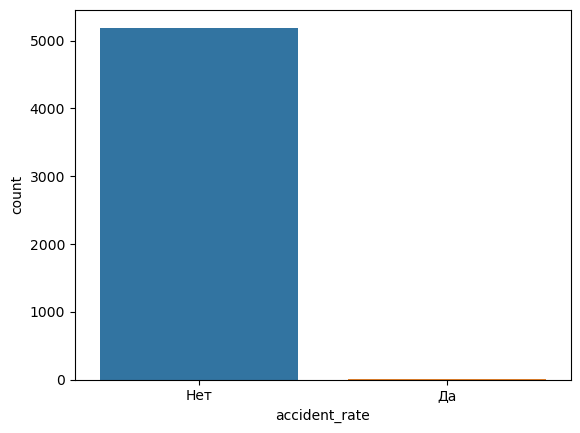

In [207]:
sns.countplot(data=df_cian, x='accident_rate')

<Axes: xlabel='finishing', ylabel='count'>

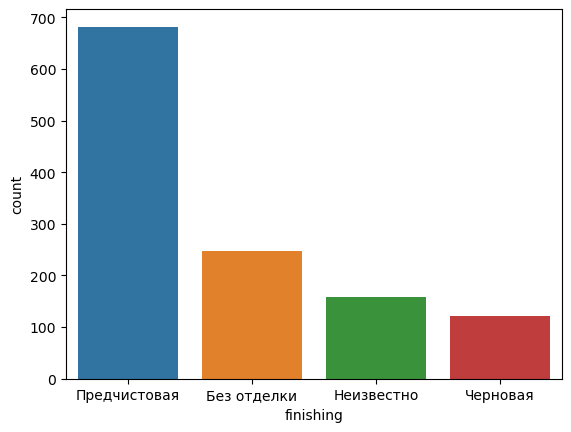

In [208]:
sns.countplot(data=df_cian, x='finishing', order = df_cian['finishing'].value_counts().index[:4])

# Анализ признаков

<Axes: xlabel='price', ylabel='Count'>

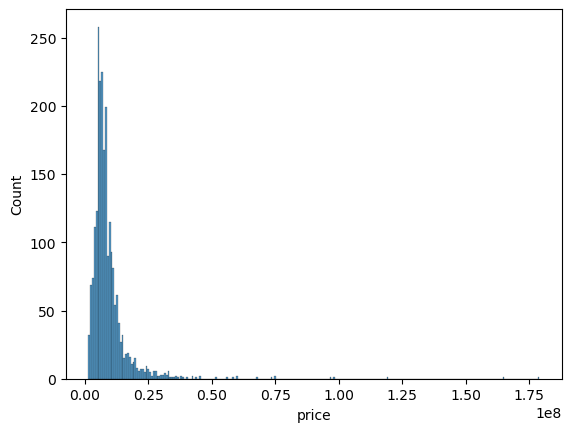

In [209]:
sns.histplot(data = df_domclick, x = 'price')

In [210]:
#df_domclick.query('price > 100000000')

<Axes: xlabel='price', ylabel='Count'>

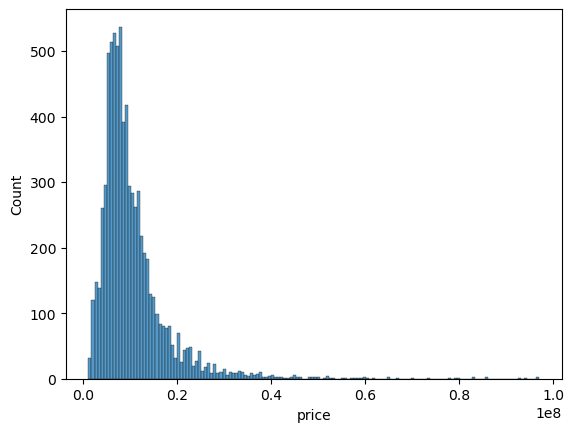

In [211]:
sns.histplot(data = df_cian, x = 'price')

<Axes: xlabel='house_floors', ylabel='Count'>

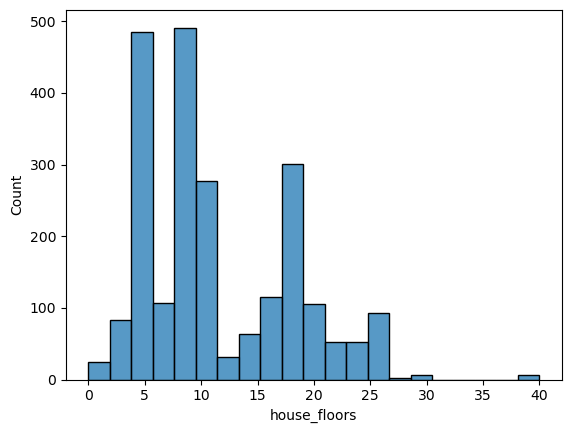

In [212]:
sns.histplot(data = df_domclick, x = 'house_floors')

<Axes: xlabel='total_floors', ylabel='Count'>

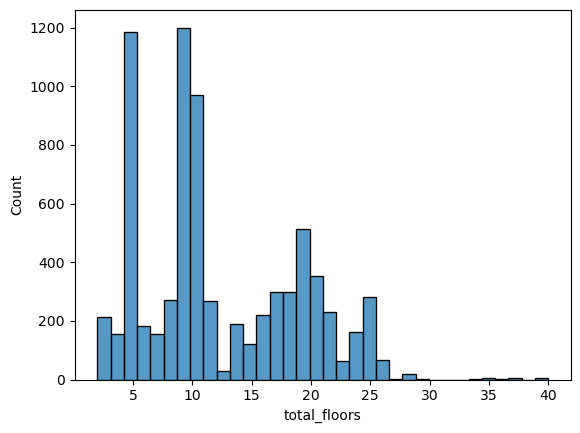

In [213]:
sns.histplot(data = df_cian, x = 'total_floors')

In [214]:
df_cian.query('total_floors > 150')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count


<Axes: xlabel='objectInfo_floor', ylabel='Count'>

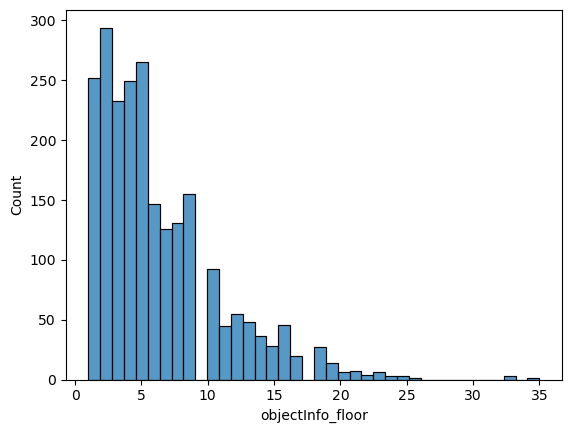

In [215]:
sns.histplot(data = df_domclick, x = 'objectInfo_floor')

<Axes: xlabel='floor_object', ylabel='Count'>

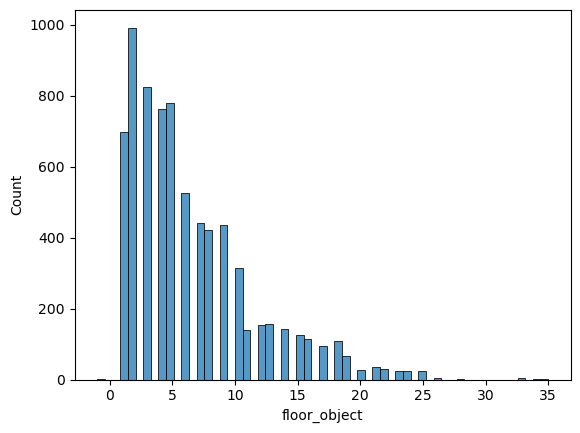

In [216]:
sns.histplot(data = df_cian, x = 'floor_object')

In [217]:
df_cian.query('floor_object < 0')

,name,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,accident_rate,gas_supply,finishing,number_of_elevators,address,link,room_count
393,2-комн. квартира,3690000,90000,-1,3,Вторичка,41.00000,NaN,5.0,NaN,1,NaN,1,1959,NaN,1,0,3,0,Нет,True,NaN,NaN,"Татарстан респ., Казань, р-н Московский, мкр. ...",https://kazan.cian.ru/sale/flat/281427345/,2


<Axes: xlabel='objectInfo_area', ylabel='Count'>

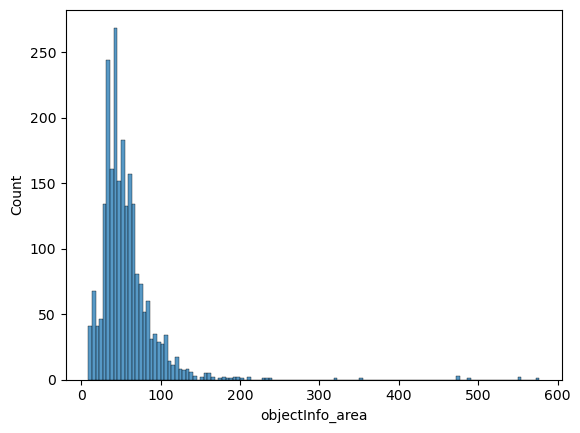

In [218]:
sns.histplot(data = df_domclick, x = 'objectInfo_area')

<Axes: xlabel='square_home', ylabel='Count'>

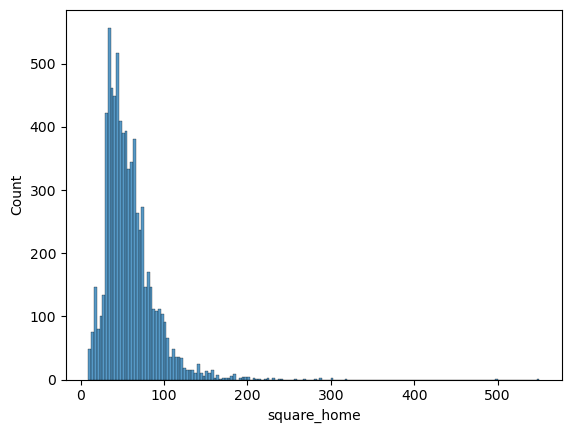

In [219]:
sns.histplot(data = df_cian, x = 'square_home')

<Axes: xlabel='objectInfo_livingArea', ylabel='Count'>

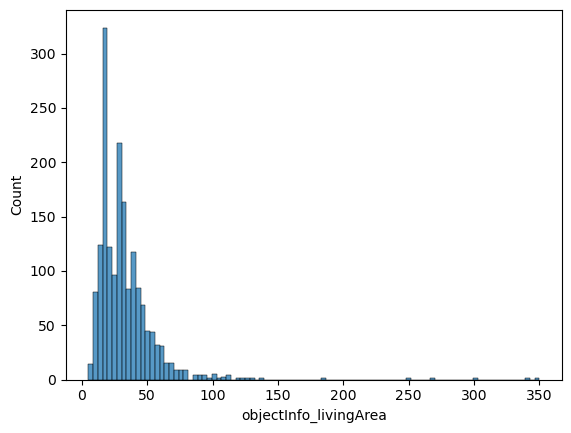

In [220]:
sns.histplot(data = df_domclick, x = 'objectInfo_livingArea')

<Axes: xlabel='live_square', ylabel='Count'>

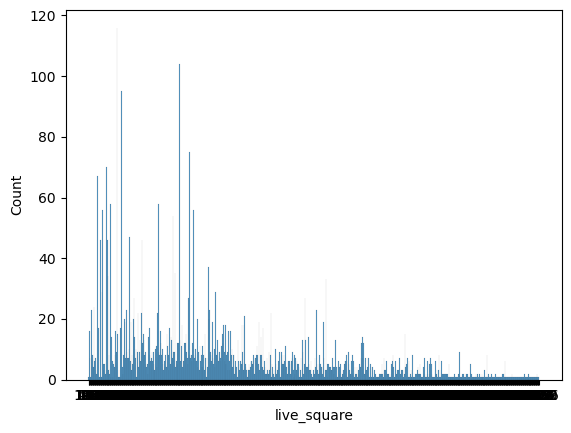

In [221]:
sns.histplot(data = df_cian, x = 'live_square')

<Axes: xlabel='objectInfo_kitchenArea', ylabel='Count'>

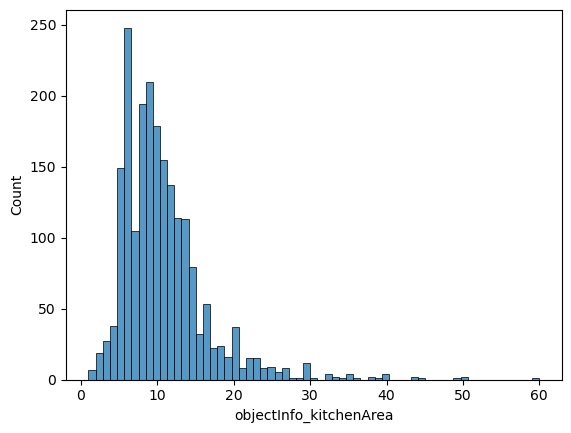

In [222]:
sns.histplot(data = df_domclick, x = 'objectInfo_kitchenArea')

<Axes: xlabel='kitchen_square', ylabel='Count'>

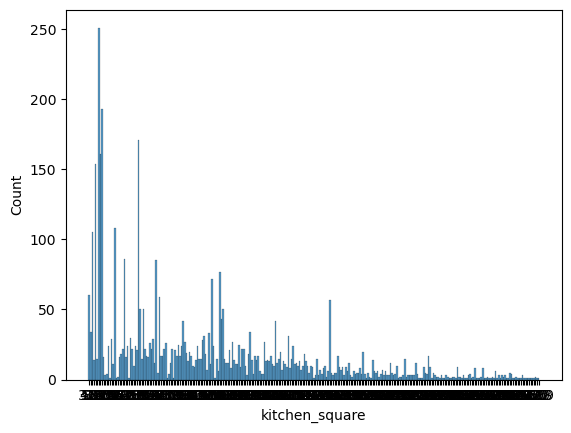

In [223]:
sns.histplot(data = df_cian, x = 'kitchen_square')

<Axes: xlabel='house_ceilingHeight', ylabel='Count'>

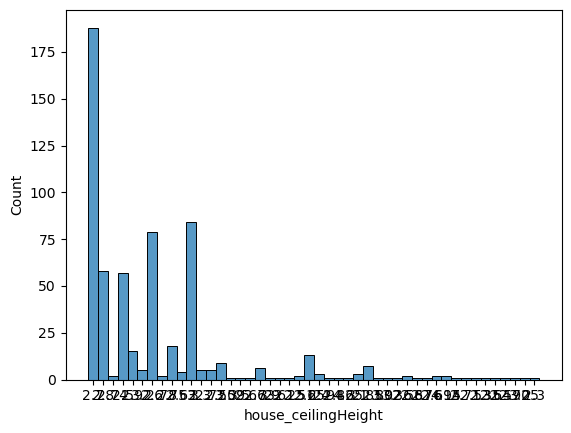

In [224]:
sns.histplot(data = df_domclick, x = 'house_ceilingHeight')

<Axes: xlabel='height_ceiling', ylabel='Count'>

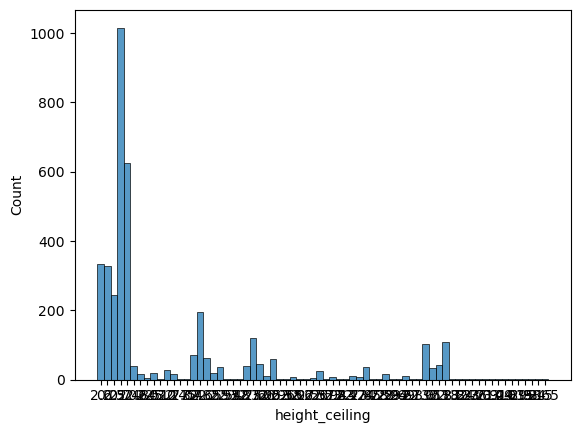

In [225]:
sns.histplot(data = df_cian, x = 'height_ceiling')

<Axes: xlabel='house_buildYear', ylabel='Count'>

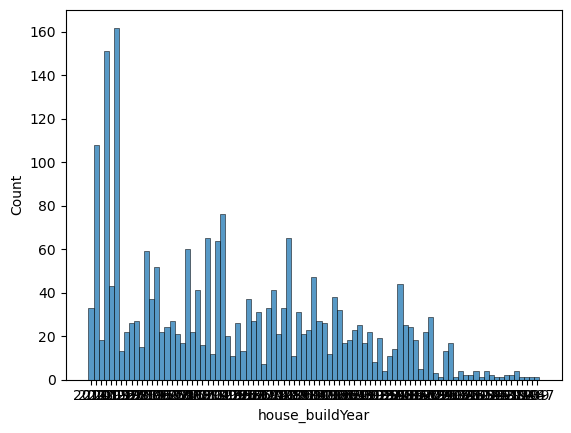

In [226]:
sns.histplot(data = df_domclick, x = 'house_buildYear')

<Axes: xlabel='yer_home', ylabel='Count'>

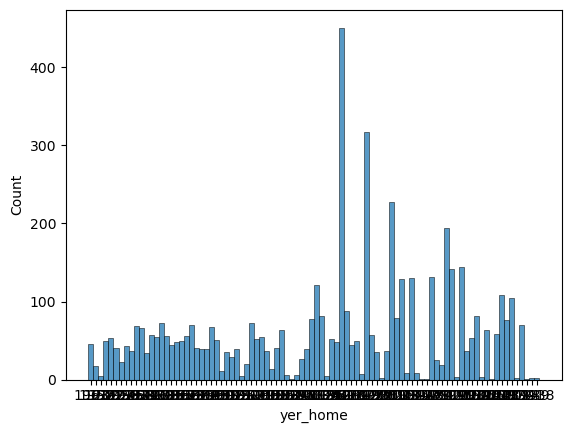

In [227]:
sns.histplot(data = df_cian, x = 'yer_home')

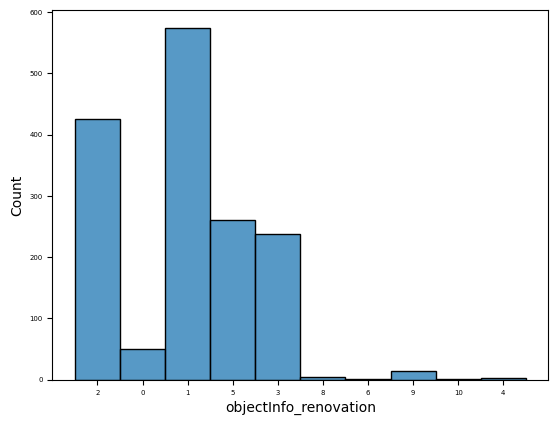

In [228]:
b = sns.histplot(data = df_domclick, x = 'objectInfo_renovation')
b.tick_params(labelsize=5)

In [229]:
df_domclick['objectInfo_renovation'].unique()

array(['2', '0', '1', nan, '5', '3', '8', '6', '9', '10', '4'],
      dtype=object)

<Axes: xlabel='repair', ylabel='Count'>

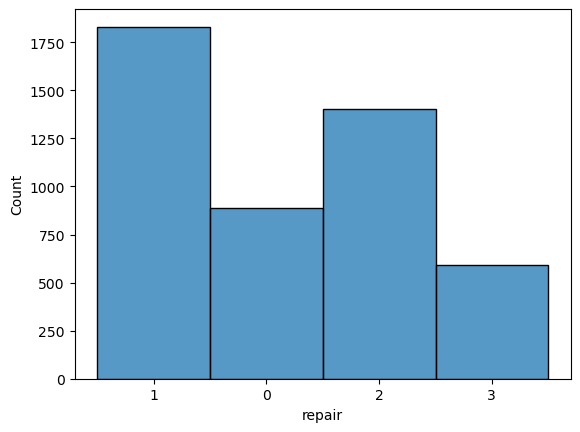

In [230]:
sns.histplot(data = df_cian, x = 'repair')

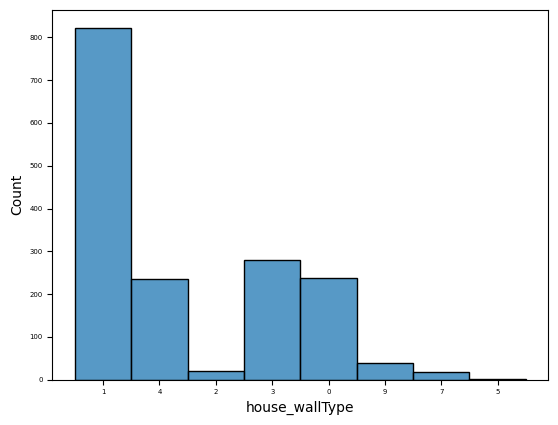

In [231]:
b = sns.histplot(data = df_domclick, x = 'house_wallType')
b.tick_params(labelsize=5)

In [232]:
df_domclick['house_wallType'].unique()

array(['1', '4', '2', nan, '3', '0', '9', '7', '5'], dtype=object)

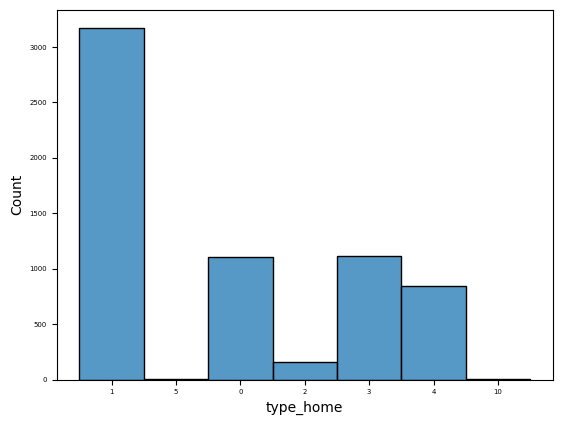

In [233]:
b = sns.histplot(data = df_cian, x = 'type_home')
b.tick_params(labelsize=5)

In [234]:
df_cian['type_home'].unique()

array(['1', '5', '0', nan, '2', '3', '4', '10'], dtype=object)

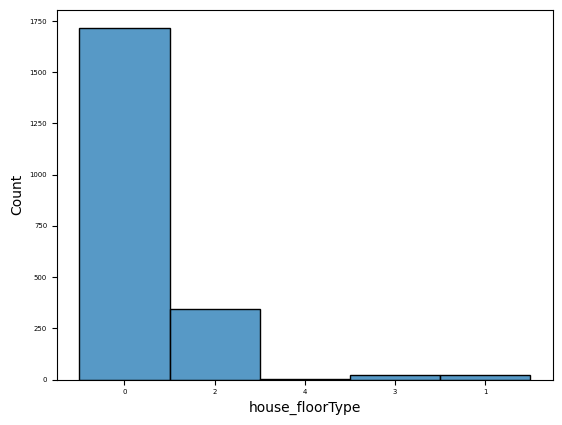

In [235]:
b = sns.histplot(data = df_domclick, x = 'house_floorType')
b.tick_params(labelsize=5)

In [236]:
df_domclick['house_floorType'].unique()

array(['0', '2', nan, '4', '3', '1'], dtype=object)

<Axes: xlabel='type_of_overlap', ylabel='Count'>

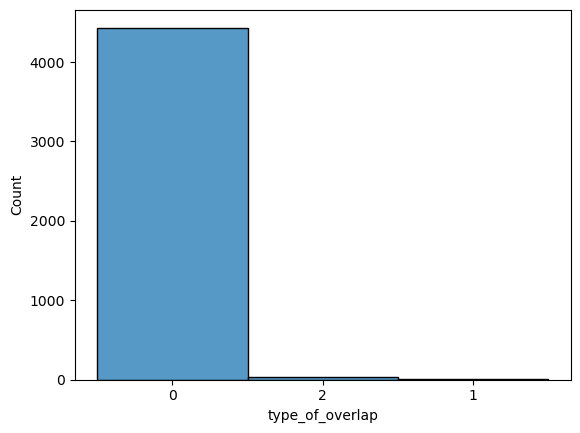

In [237]:
sns.histplot(data = df_cian, x = 'type_of_overlap')

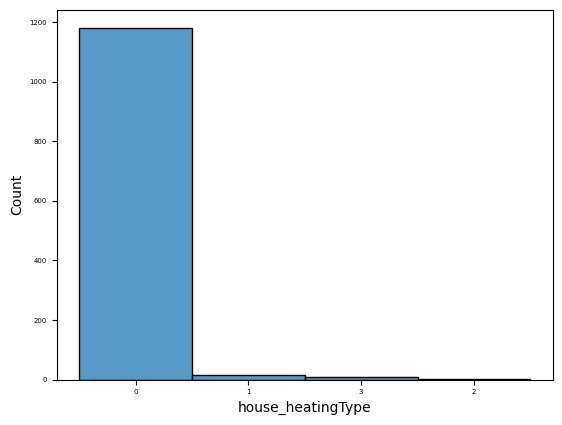

In [238]:
b = sns.histplot(data = df_domclick, x = 'house_heatingType')
b.tick_params(labelsize=5)

In [239]:
df_domclick['house_heatingType'].unique()

array(['0', nan, '1', '3', '2'], dtype=object)

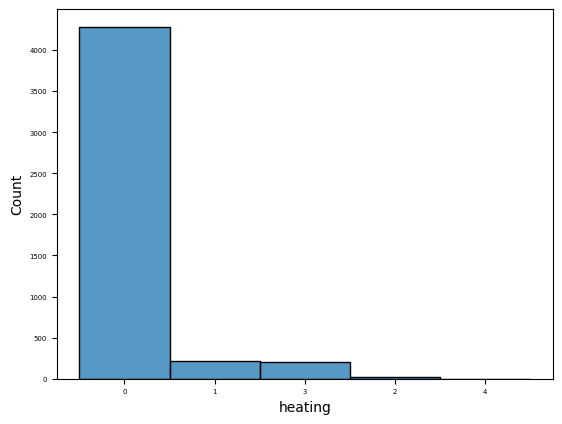

In [240]:
b = sns.histplot(data = df_cian, x = 'heating')
b.tick_params(labelsize=5)

In [241]:
df_cian['heating'].unique()

array(['0', nan, '1', '3', '2', '4'], dtype=object)

<Axes: xlabel='house_entranceCount', ylabel='count'>

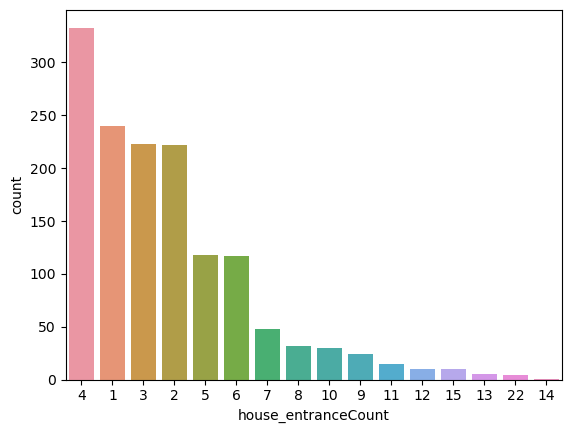

In [242]:
sns.countplot(data = df_domclick, x = 'house_entranceCount', order = df_domclick['house_entranceCount'].value_counts().index)

<Axes: xlabel='entrances', ylabel='count'>

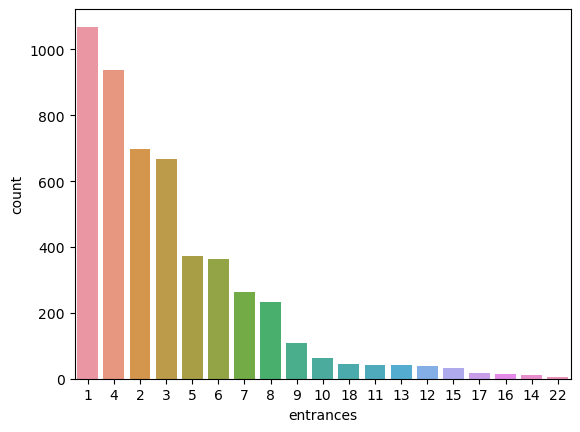

In [243]:
sns.countplot(data = df_cian, x = 'entrances', order = df_cian['entrances'].value_counts().index)

<Axes: xlabel='house_elevatorsCount', ylabel='count'>

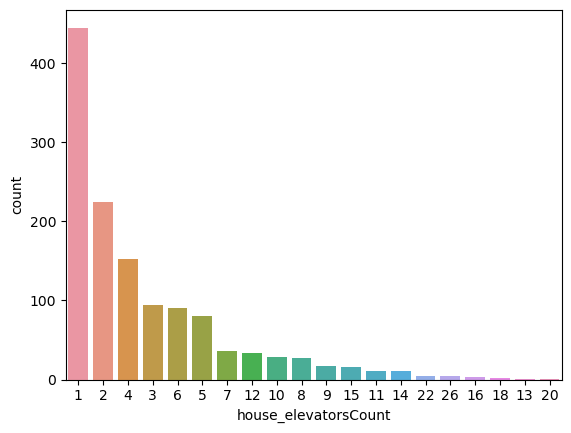

In [244]:
sns.countplot(data = df_domclick, x = 'house_elevatorsCount', order = df_domclick['house_elevatorsCount'].value_counts().index)

<Axes: xlabel='number_of_elevators', ylabel='count'>

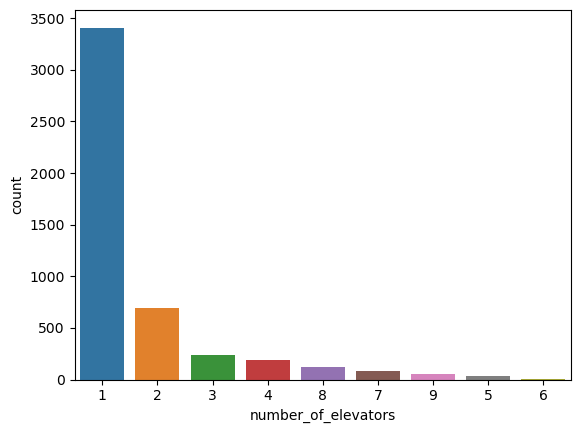

In [245]:
sns.countplot(data = df_cian, x = 'number_of_elevators', order = df_cian['number_of_elevators'].value_counts().index)

# Кодирование данных

In [246]:
df_domclick_prepared = df_domclick.drop(columns = ['id', 'region', 'address', 'house_areaCommonPropery', 'house_areaResidential', 'objectInfo_loggias', 'saleType'])

cat_cols = ['house_hasGarbageDisposer', 'house_coldWaterType', 'house_electricalType', 'house_energyEfficiency',
           'house_fireFightingType', 'house_foundationType', 'house_sewerageType', 'house_ventilationType', 'objectInfo_hasGas']



df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2297 non-null   float64
 1   longitude                      2297 non-null   float64
 2   price                          2297 non-null   int64  
 3   house_floors                   2297 non-null   int64  
 4   house_buildYear                2279 non-null   object 
 5   house_ceilingHeight            594 non-null    object 
 6   house_hasGarbageDisposer       1087 non-null   object 
 7   house_liftsFreight             775 non-null    float64
 8   house_liftsPassenger           1248 non-null   float64
 9   house_wallType                 1650 non-null   object 
 10  house_areaNonResidential       1385 non-null   object 
 11  house_basementArea             1360 non-null   object 
 12  house_chuteCount               365 non-null    o

In [247]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_domclick_prepared[cat_cols] = ord_enc.fit_transform(df_domclick_prepared[cat_cols])
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2297 non-null   float64
 1   longitude                      2297 non-null   float64
 2   price                          2297 non-null   int64  
 3   house_floors                   2297 non-null   int64  
 4   house_buildYear                2279 non-null   object 
 5   house_ceilingHeight            594 non-null    object 
 6   house_hasGarbageDisposer       1087 non-null   float64
 7   house_liftsFreight             775 non-null    float64
 8   house_liftsPassenger           1248 non-null   float64
 9   house_wallType                 1650 non-null   object 
 10  house_areaNonResidential       1385 non-null   object 
 11  house_basementArea             1360 non-null   object 
 12  house_chuteCount               365 non-null    o

In [248]:
non_num_cols = ['price', 'house_buildYear', 'house_ceilingHeight', 'house_areaNonResidential', 'house_basementArea', 'house_chuteCount',
               'house_electricalEntriesCount', 'house_elevatorsCount', 'house_entranceCount', 'house_parkingSquare', 'house_sewerageCesspoolsVolume',
               'objectInfo_area', 'objectInfo_connectedBathrooms', 'objectInfo_separatedBathrooms', 'house_wallType', 'house_floorType',
                'house_heatingType', 'objectInfo_renovation']

for col in non_num_cols:
    df_domclick_prepared[col] = pd.to_numeric(df_domclick_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [249]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2297 non-null   float64
 1   longitude                      2297 non-null   float64
 2   price                          2297 non-null   int64  
 3   house_floors                   2297 non-null   int64  
 4   house_buildYear                2279 non-null   float64
 5   house_ceilingHeight            594 non-null    float64
 6   house_hasGarbageDisposer       1087 non-null   float64
 7   house_liftsFreight             775 non-null    float64
 8   house_liftsPassenger           1248 non-null   float64
 9   house_wallType                 1650 non-null   float64
 10  house_areaNonResidential       1385 non-null   float64
 11  house_basementArea             1360 non-null   float64
 12  house_chuteCount               365 non-null    f

In [250]:
df_cian_prepared = df_cian.drop(columns = ['name', 'link', 'address', 'accident_rate'])
                                
cat_cols_cian = ['type_of_home', 'finishing', 'gas_supply']

df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7483 entries, 0 to 12659
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                7483 non-null   int64  
 1   price_for_metr       7483 non-null   int64  
 2   floor_object         7483 non-null   int64  
 3   total_floors         7483 non-null   int64  
 4   type_of_home         7483 non-null   object 
 5   square_home          7483 non-null   float64
 6   live_square          4597 non-null   object 
 7   kitchen_square       4329 non-null   object 
 8   height_ceiling       3788 non-null   object 
 9   bathroom             3069 non-null   object 
 10  balcony              5042 non-null   object 
 11  repair               4716 non-null   object 
 12  yer_home             5155 non-null   object 
 13  garbage_chute        540 non-null    object 
 14  type_home            6403 non-null   object 
 15  type_of_overlap      4477 non-null   objec

In [251]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_cian_prepared[cat_cols_cian] = ord_enc.fit_transform(df_cian_prepared[cat_cols_cian])
df_cian_prepared = df_cian_prepared.replace('Да', 1)
df_cian_prepared = df_cian_prepared.replace('Нет', 0)
df_cian_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7483 entries, 0 to 12659
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                7483 non-null   int64  
 1   price_for_metr       7483 non-null   int64  
 2   floor_object         7483 non-null   int64  
 3   total_floors         7483 non-null   int64  
 4   type_of_home         7483 non-null   float64
 5   square_home          7483 non-null   float64
 6   live_square          4597 non-null   object 
 7   kitchen_square       4329 non-null   object 
 8   height_ceiling       3788 non-null   object 
 9   bathroom             3069 non-null   object 
 10  balcony              5042 non-null   object 
 11  repair               4716 non-null   object 
 12  yer_home             5155 non-null   object 
 13  garbage_chute        540 non-null    float64
 14  type_home            6403 non-null   object 
 15  type_of_overlap      4477 non-null   objec

In [252]:
non_num_cols_cian = ['live_square', 'kitchen_square', 'height_ceiling', 'bathroom', 'balcony', 'yer_home',
                     'entrances', 'number_of_elevators', 'room_count', 'repair', 'type_home', 'type_of_overlap', 'heating']

for col in non_num_cols_cian:
    df_cian_prepared[col] = pd.to_numeric(df_cian_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [253]:
df_cian_prepared.info()
df_cian_prepared.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7483 entries, 0 to 12659
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                7483 non-null   int64  
 1   price_for_metr       7483 non-null   int64  
 2   floor_object         7483 non-null   int64  
 3   total_floors         7483 non-null   int64  
 4   type_of_home         7483 non-null   float64
 5   square_home          7483 non-null   float64
 6   live_square          4597 non-null   float64
 7   kitchen_square       4329 non-null   float64
 8   height_ceiling       3788 non-null   float64
 9   bathroom             3069 non-null   float64
 10  balcony              5042 non-null   float64
 11  repair               4716 non-null   float64
 12  yer_home             5155 non-null   float64
 13  garbage_chute        540 non-null    float64
 14  type_home            6403 non-null   float64
 15  type_of_overlap      4477 non-null   float

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
0,1100000,88710,5,5,0.00000,12.40000,NaN,NaN,NaN,NaN,1.00000,1.00000,1963.00000,NaN,1.00000,0.00000,3.00000,0.00000,1.00000,NaN,NaN,0
1,1570000,127642,3,5,0.00000,12.30000,4.30000,3.00000,2.60000,NaN,NaN,NaN,1963.00000,NaN,1.00000,0.00000,3.00000,0.00000,1.00000,NaN,NaN,0
2,1550000,77500,3,3,0.00000,20.00000,11.00000,4.00000,NaN,1.00000,1.00000,0.00000,1957.00000,NaN,1.00000,NaN,3.00000,0.00000,1.00000,NaN,NaN,1
3,1400000,67961,1,3,0.00000,20.60000,10.60000,5.00000,0.00000,NaN,NaN,NaN,NaN,NaN,5.00000,NaN,NaN,NaN,0.00000,NaN,NaN,1
4,1499000,128120,2,2,0.00000,11.70000,1.70000,5.00000,0.00000,NaN,NaN,NaN,1932.00000,NaN,1.00000,2.00000,3.00000,0.00000,1.00000,NaN,NaN,1


In [254]:
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2297 non-null   float64
 1   longitude                      2297 non-null   float64
 2   price                          2297 non-null   int64  
 3   house_floors                   2297 non-null   int64  
 4   house_buildYear                2279 non-null   float64
 5   house_ceilingHeight            594 non-null    float64
 6   house_hasGarbageDisposer       1087 non-null   float64
 7   house_liftsFreight             775 non-null    float64
 8   house_liftsPassenger           1248 non-null   float64
 9   house_wallType                 1650 non-null   float64
 10  house_areaNonResidential       1385 non-null   float64
 11  house_basementArea             1360 non-null   float64
 12  house_chuteCount               365 non-null    f

# Соединение датасетов

In [255]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [256]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [257]:
df_domclick['objectInfo_separatedBathrooms'].unique()

array(['0', '1', nan, '2'], dtype=object)

In [258]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    df_cian[col_cian].unique()
    df_domclick[col_domclick].unique()

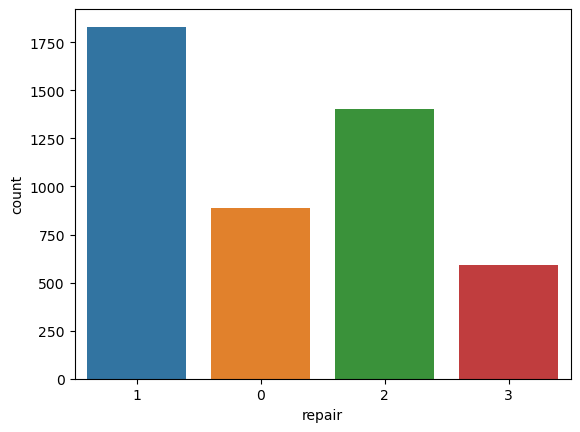

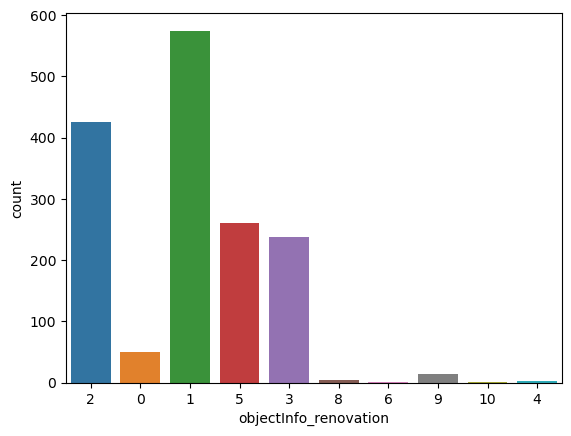

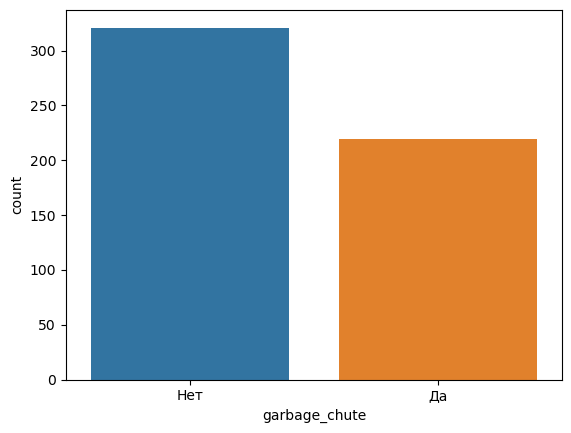

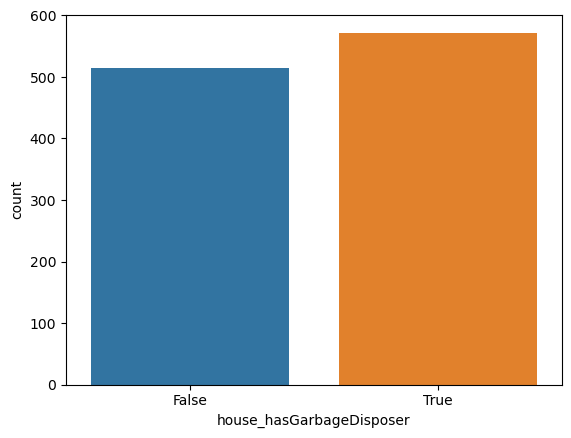

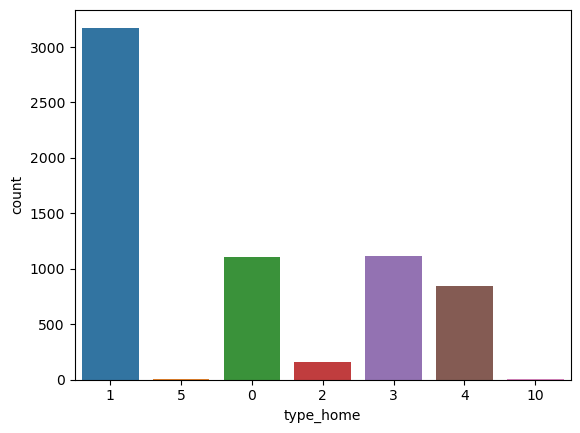

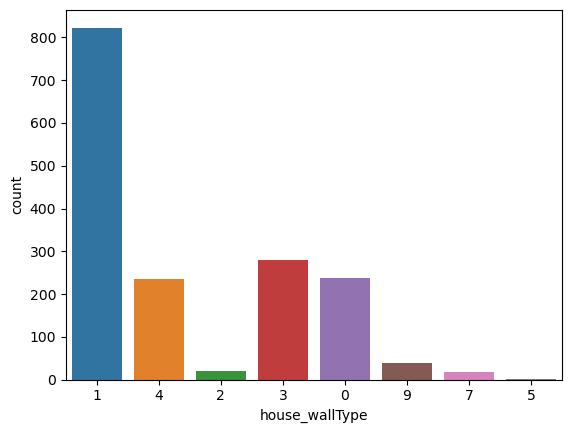

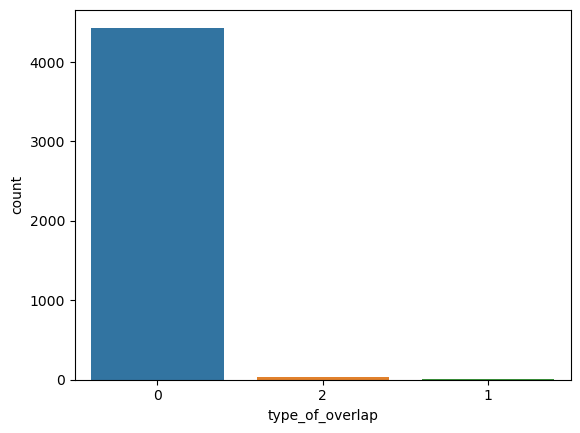

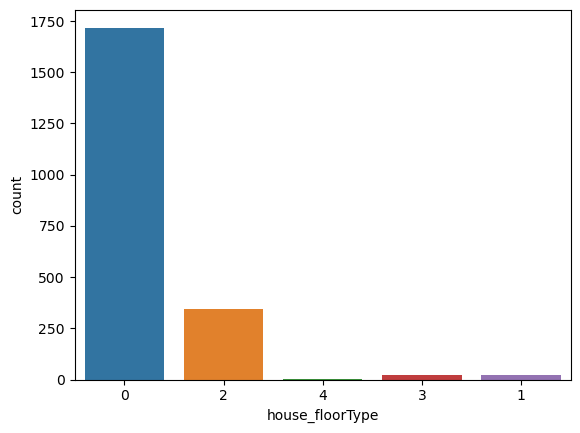

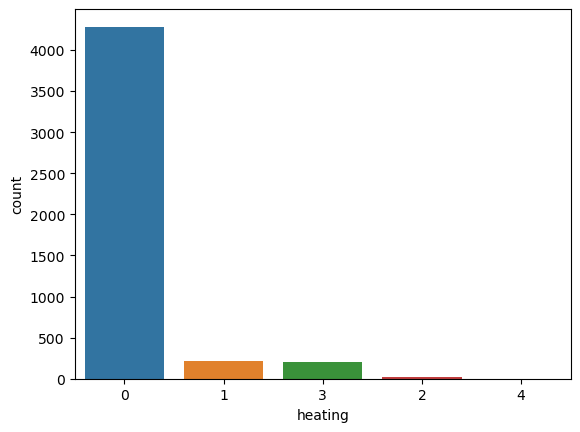

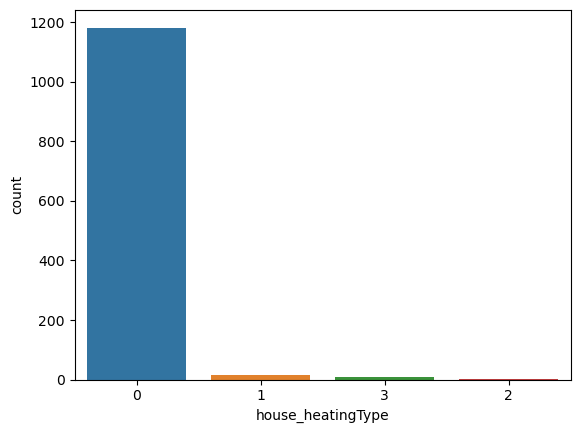

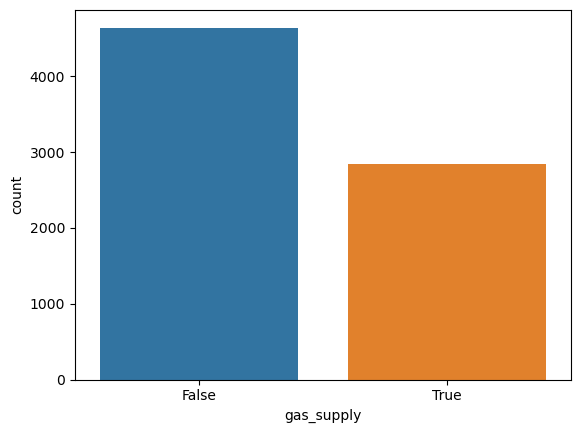

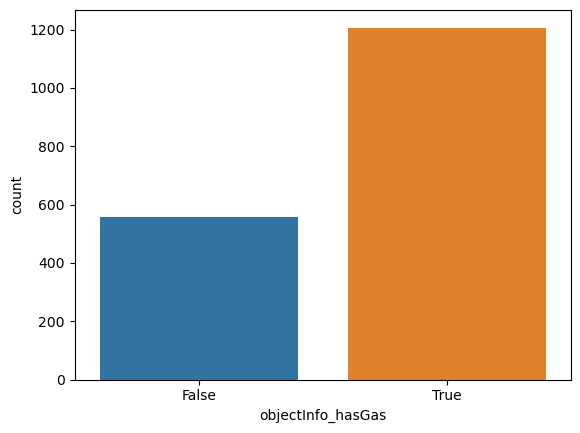

<Figure size 640x480 with 0 Axes>

In [259]:
for col_cian, col_domclick in zip(cat_cols_cian, cat_cols_domclick):
    sns.countplot(data = df_cian, x = col_cian)
    plt.figure()
    sns.countplot(data = df_domclick, x = col_domclick)
    plt.figure()

In [260]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

In [261]:
common_features = ['price', 'room_count', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'repairType', 'buildYear', 'hasGarbageChute', 'wallType', 'floorType', 'entranceCount',
                   'heatingType', 'hasGas', 'elevatorCount']

domclick_cf = ['price', 'objectInfo_rooms', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 'objectInfo_livingArea', 
               'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies', 'objectInfo_renovation', 'house_buildYear',
               'house_hasGarbageDisposer', 'house_wallType', 'house_floorType', 'house_entranceCount', 'house_heatingType', 
               'objectInfo_hasGas', 'house_elevatorsCount']

cian_cf = ['price', 'room_count', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling', 'bathroom',
           'balcony', 'repair', 'yer_home', 'garbage_chute',  'type_home', 'type_of_overlap', 'entrances', 'heating', 'gas_supply',
           'number_of_elevators']

In [262]:
merge_domclick = df_domclick_prepared[domclick_cf]
merge_domclick.columns = common_features
merge_domclick.info()
merge_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            2297 non-null   int64  
 1   room_count       2297 non-null   int64  
 2   floor            2297 non-null   int64  
 3   totalFloors      2297 non-null   int64  
 4   area             2297 non-null   float64
 5   kitchenArea      2067 non-null   float64
 6   livingArea       1740 non-null   float64
 7   ceilingHeight    594 non-null    float64
 8   bathroomCount    696 non-null    float64
 9   balconyCount     2297 non-null   int64  
 10  repairType       1571 non-null   float64
 11  buildYear        2279 non-null   float64
 12  hasGarbageChute  1087 non-null   float64
 13  wallType         1650 non-null   float64
 14  floorType        2107 non-null   float64
 15  entranceCount    1432 non-null   float64
 16  heatingType      1210 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,8390000,1,3,5,41.60000,12.30000,NaN,2.70000,0.00000,0,2.00000,2014.00000,0.00000,1.00000,0.00000,2.00000,0.00000,1.00000,NaN
1,6900000,1,17,20,35.00000,12.00000,13.00000,2.70000,0.00000,1,0.00000,2023.00000,0.00000,4.00000,0.00000,NaN,NaN,0.00000,NaN
2,8700000,1,9,9,47.00000,9.00000,24.00000,2.80000,1.00000,1,1.00000,2001.00000,1.00000,1.00000,0.00000,3.00000,0.00000,1.00000,3.00000
3,5040000,1,4,20,39.10000,12.30000,NaN,NaN,NaN,1,NaN,2021.00000,NaN,2.00000,0.00000,NaN,NaN,NaN,1.00000
4,10500000,2,5,6,73.30000,12.00000,NaN,2.70000,NaN,0,NaN,2013.00000,0.00000,1.00000,0.00000,NaN,NaN,1.00000,NaN


In [263]:
merge_domclick['repairType'].unique()

array([ 2.,  0.,  1., nan,  5.,  3.,  8.,  6.,  9., 10.,  4.])

In [264]:
merge_cian = df_cian_prepared[cian_cf]
merge_cian.columns = common_features
merge_cian.reset_index(drop = True, inplace=True)
merge_cian.info()
merge_cian.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483 entries, 0 to 7482
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            7483 non-null   int64  
 1   room_count       7483 non-null   int64  
 2   floor            7483 non-null   int64  
 3   totalFloors      7483 non-null   int64  
 4   area             7483 non-null   float64
 5   kitchenArea      4329 non-null   float64
 6   livingArea       4597 non-null   float64
 7   ceilingHeight    3788 non-null   float64
 8   bathroomCount    3069 non-null   float64
 9   balconyCount     5042 non-null   float64
 10  repairType       4716 non-null   float64
 11  buildYear        5155 non-null   float64
 12  hasGarbageChute  540 non-null    float64
 13  wallType         6403 non-null   float64
 14  floorType        4477 non-null   float64
 15  entranceCount    5028 non-null   float64
 16  heatingType      4724 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,1100000,0,5,5,12.40000,NaN,NaN,NaN,NaN,1.00000,1.00000,1963.00000,NaN,1.00000,0.00000,3.00000,0.00000,1.00000,NaN
1,1570000,0,3,5,12.30000,3.00000,4.30000,2.60000,NaN,NaN,NaN,1963.00000,NaN,1.00000,0.00000,3.00000,0.00000,1.00000,NaN
2,1550000,1,3,3,20.00000,4.00000,11.00000,NaN,1.00000,1.00000,0.00000,1957.00000,NaN,1.00000,NaN,3.00000,0.00000,1.00000,NaN
3,1400000,1,1,3,20.60000,5.00000,10.60000,0.00000,NaN,NaN,NaN,NaN,NaN,5.00000,NaN,NaN,NaN,0.00000,NaN
4,1499000,1,2,2,11.70000,5.00000,1.70000,0.00000,NaN,NaN,NaN,1932.00000,NaN,1.00000,2.00000,3.00000,0.00000,1.00000,NaN


In [265]:
df_combined = pd.concat([merge_domclick, merge_cian])

In [266]:
df_combined = df_combined.drop_duplicates()

In [267]:
df_combined.reset_index(drop = True, inplace=True)

In [268]:
df_combined.info()
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            9760 non-null   int64  
 1   room_count       9760 non-null   int64  
 2   floor            9760 non-null   int64  
 3   totalFloors      9760 non-null   int64  
 4   area             9760 non-null   float64
 5   kitchenArea      6382 non-null   float64
 6   livingArea       6323 non-null   float64
 7   ceilingHeight    4371 non-null   float64
 8   bathroomCount    3754 non-null   float64
 9   balconyCount     7330 non-null   float64
 10  repairType       6279 non-null   float64
 11  buildYear        7424 non-null   float64
 12  hasGarbageChute  1626 non-null   float64
 13  wallType         8035 non-null   float64
 14  floorType        6576 non-null   float64
 15  entranceCount    6452 non-null   float64
 16  heatingType      5927 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,8390000,1,3,5,41.60000,12.30000,NaN,2.70000,0.00000,0.00000,2.00000,2014.00000,0.00000,1.00000,0.00000,2.00000,0.00000,1.00000,NaN
1,6900000,1,17,20,35.00000,12.00000,13.00000,2.70000,0.00000,1.00000,0.00000,2023.00000,0.00000,4.00000,0.00000,NaN,NaN,0.00000,NaN
2,8700000,1,9,9,47.00000,9.00000,24.00000,2.80000,1.00000,1.00000,1.00000,2001.00000,1.00000,1.00000,0.00000,3.00000,0.00000,1.00000,3.00000
3,5040000,1,4,20,39.10000,12.30000,NaN,NaN,NaN,1.00000,NaN,2021.00000,NaN,2.00000,0.00000,NaN,NaN,NaN,1.00000
4,10500000,2,5,6,73.30000,12.00000,NaN,2.70000,NaN,0.00000,NaN,2013.00000,0.00000,1.00000,0.00000,NaN,NaN,1.00000,NaN


<Axes: xlabel='price', ylabel='Count'>

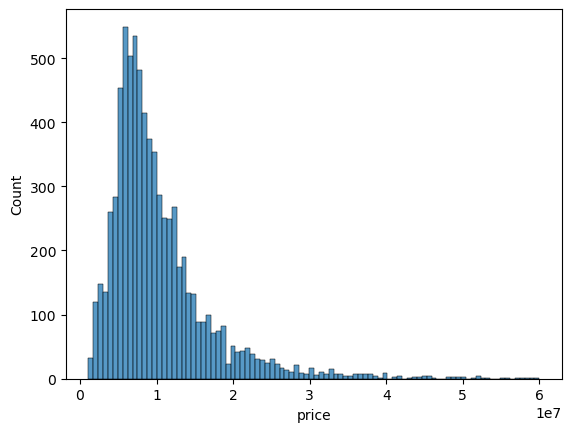

In [269]:
sns.histplot(data = df_cian_prepared.query('price < 60000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

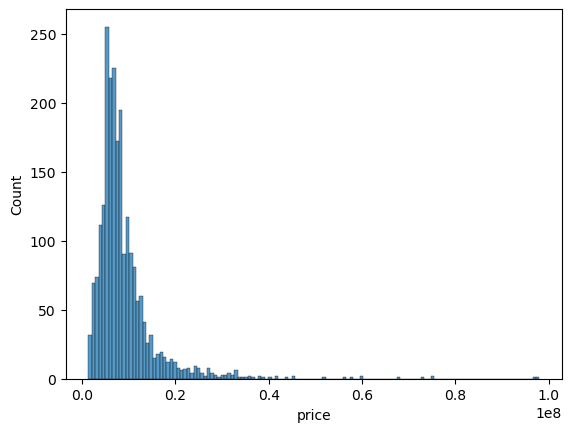

In [270]:
sns.histplot(data = df_domclick_prepared.query('price < 100000000'), x = 'price')

<Axes: xlabel='price', ylabel='Count'>

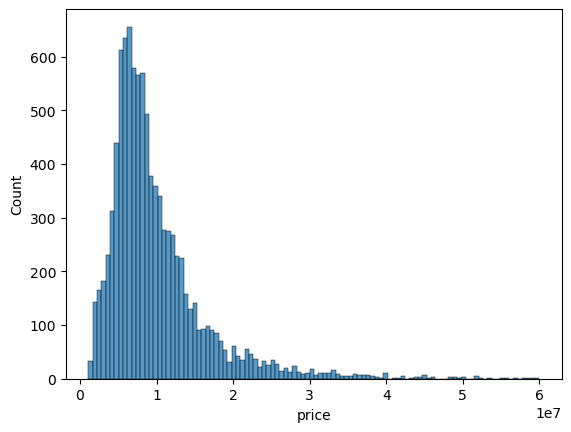

In [271]:
sns.histplot(data = df_combined.query('price < 60000000'), x = 'price')

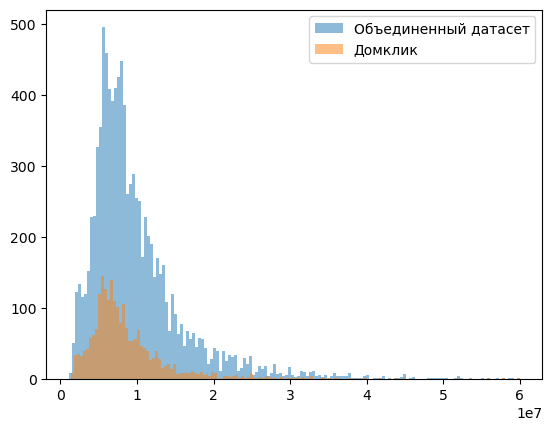

In [272]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.legend(loc='upper right')
plt.show()

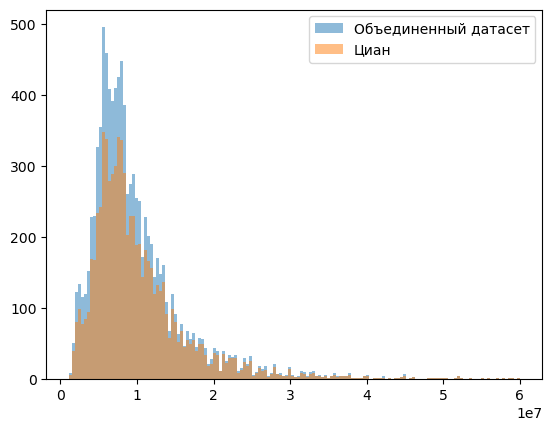

In [273]:
plt.hist(df_combined.query('price < 60000000')['price'], 150, alpha=0.5, label='Объединенный датасет')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

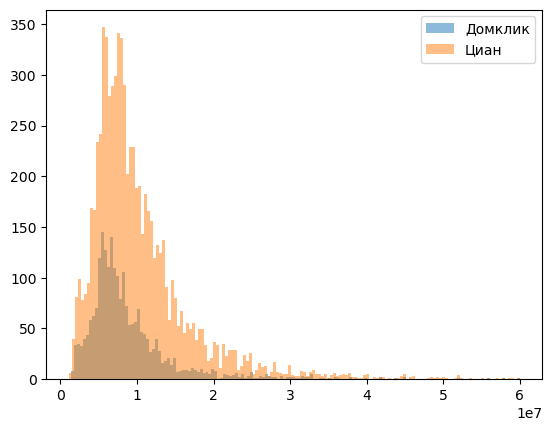

In [274]:
plt.hist(df_domclick_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Домклик')
plt.hist(df_cian_prepared.query('price < 60000000')['price'], 150, alpha=0.5, label='Циан')
plt.legend(loc='upper right')
plt.show()

In [275]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [276]:
df_domclick_prepared['price'].describe()

count        2297.00000
mean      9231196.12799
std       8877440.74287
min       1350000.00000
25%       5500000.00000
50%       7300000.00000
75%      10300000.00000
max     179000000.00000
Name: price, dtype: float64

In [277]:
df_cian_prepared['price'].describe()

count       7483.00000
mean    10476774.60297
std      7605991.24402
min      1100000.00000
25%      6100000.00000
50%      8500000.00000
75%     12452520.00000
max     97000000.00000
Name: price, dtype: float64

In [278]:
df_combined['price'].describe()

count        9760.00000
mean     10184514.07254
std       7944449.09163
min       1100000.00000
25%       5950000.00000
50%       8185000.00000
75%      11999000.00000
max     179000000.00000
Name: price, dtype: float64

In [279]:
cat_cols_cian = ['repair', 'garbage_chute', 'type_home', 'type_of_overlap', 'heating', 'gas_supply']

cat_cols_domclick = ['objectInfo_renovation', 'house_hasGarbageDisposer', 'house_wallType', 'house_floorType',
                     'house_heatingType', 'objectInfo_hasGas']

cat_cols_cf = ['repairType', 'hasGarbageChute', 'wallType', 'floorType', 'heatingType', 'hasGas']

In [280]:
num_cols_cian = ['price', 'floor_object', 'total_floors', 'square_home', 'kitchen_square', 'live_square', 'height_ceiling',
                 'bathroom', 'balcony', 'buildYear', 'entranceCount', 'elevatorCount']

num_cols_domclick = ['price', 'objectInfo_floor', 'house_floors', 'objectInfo_area', 'objectInfo_kitchenArea', 
                     'objectInfo_livingArea', 'house_ceilingHeight', 'objectInfo_separatedBathrooms', 'objectInfo_balconies',
                     'house_buildYear', 'house_entranceCount', 'house_elevatorsCount']

num_cols_cf = ['price', 'floor', 'totalFloors', 'area', 'kitchenArea', 'livingArea', 'ceilingHeight', 'bathroomCount', 
                   'balconyCount', 'buildYear', 'entranceCount', 'elevatorCount']

C:\Users\shadee\AppData\Local\Temp\ipykernel_11352\3097855927.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


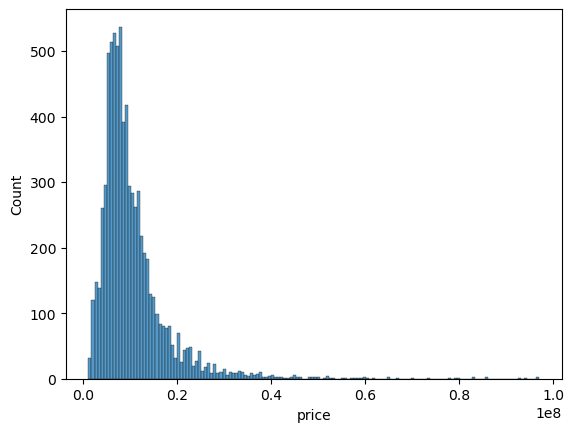

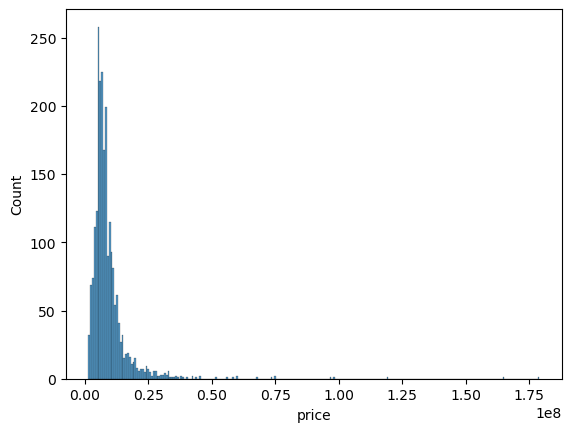

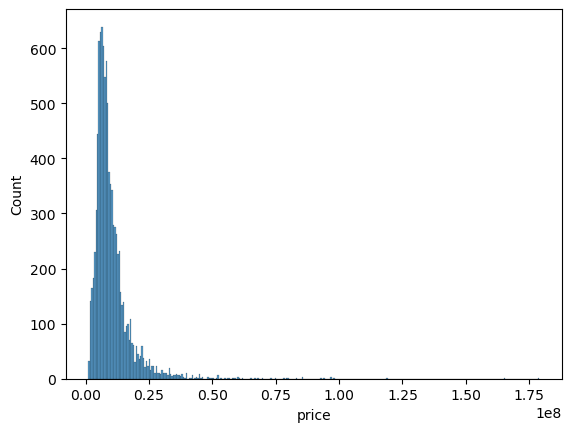

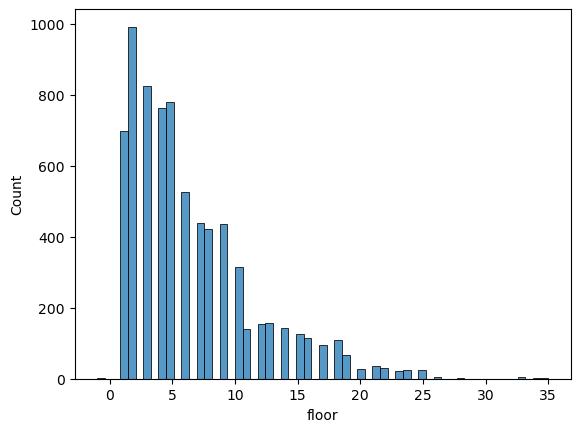

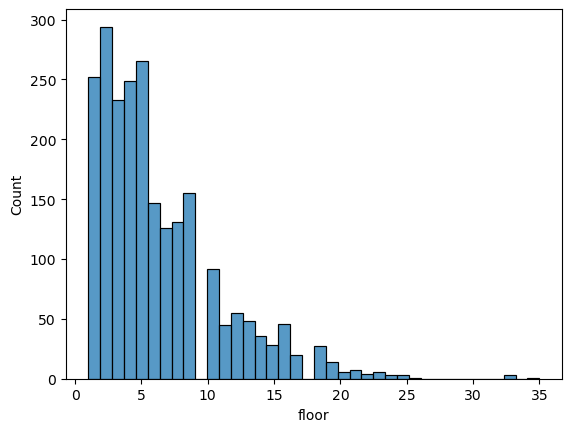

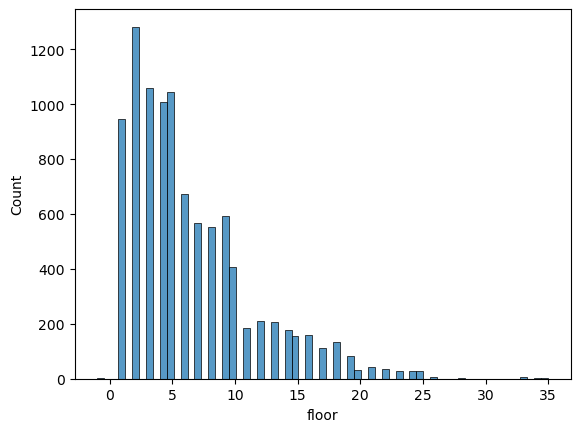

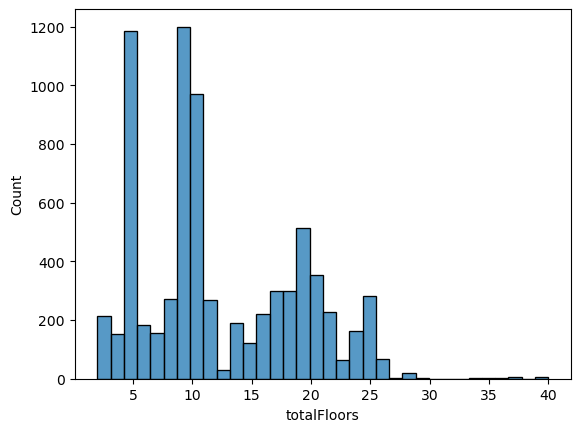

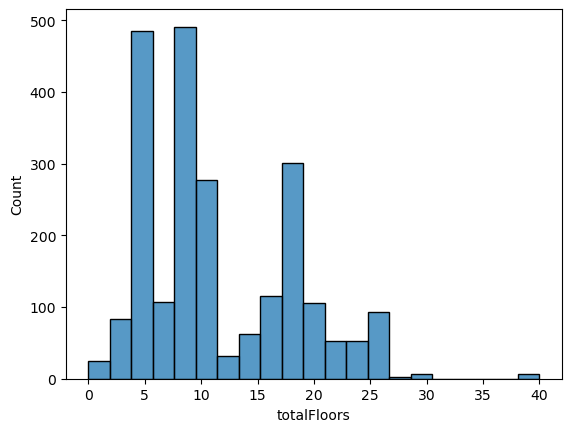

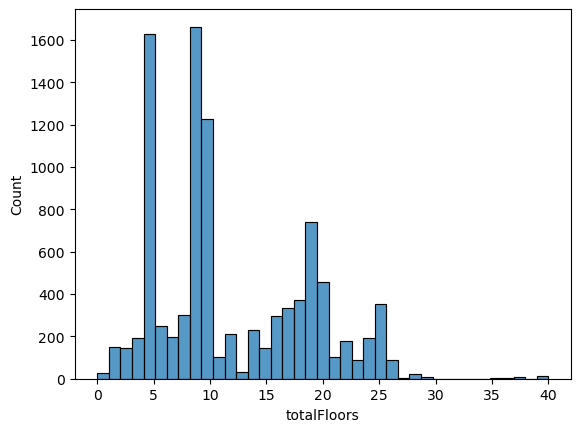

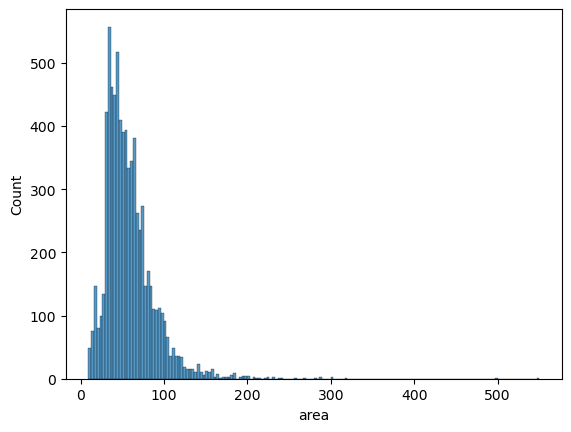

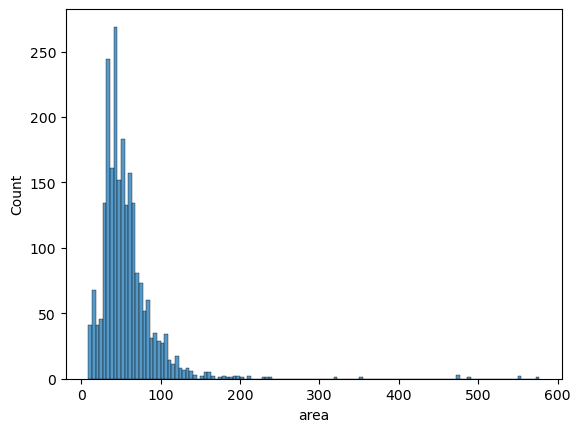

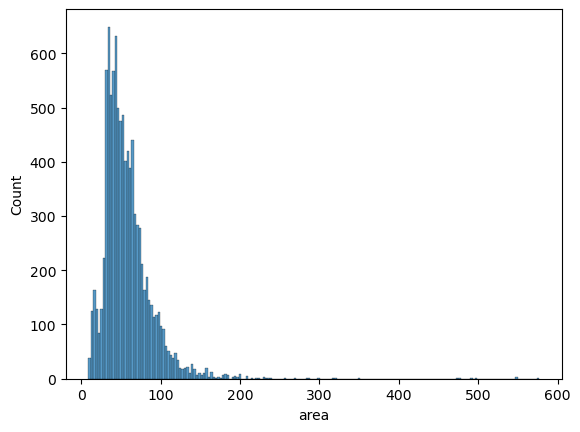

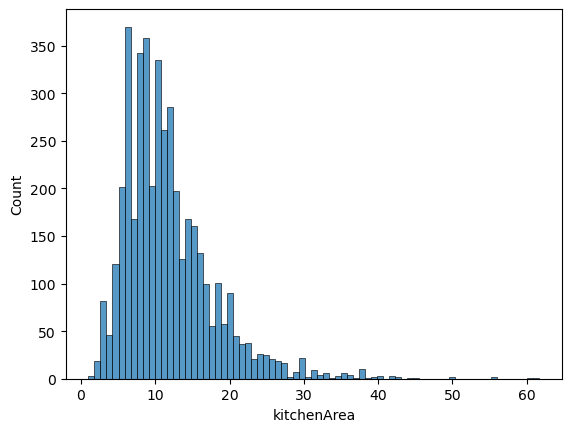

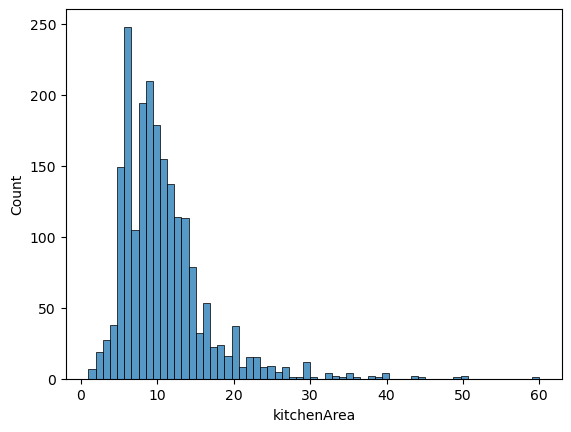

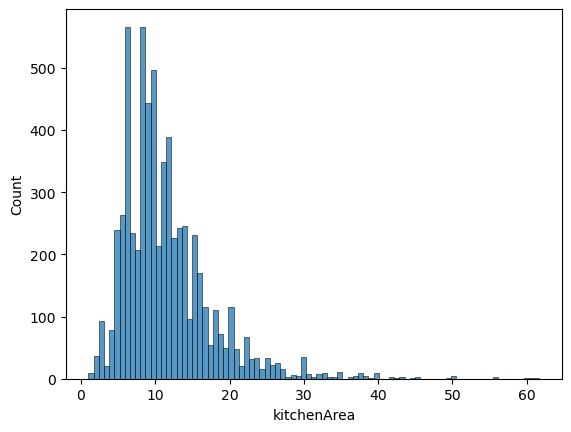

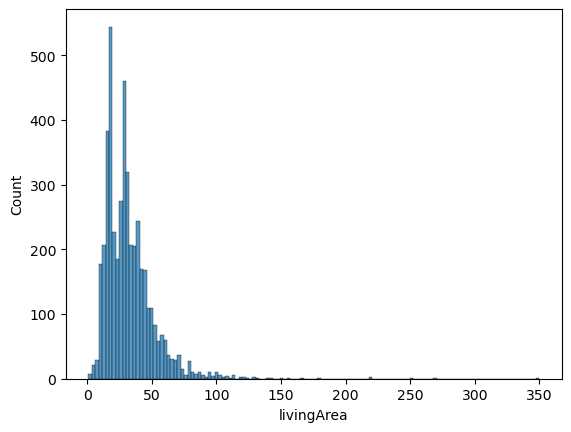

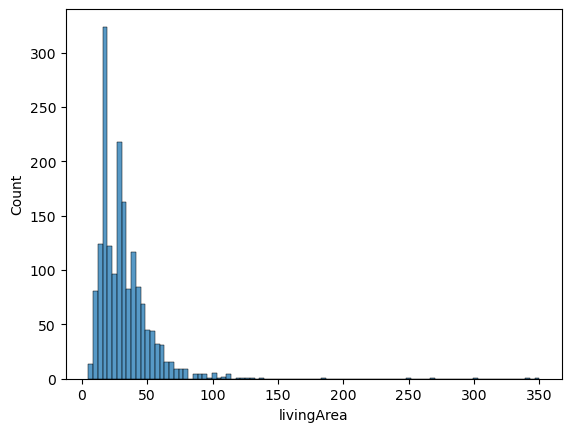

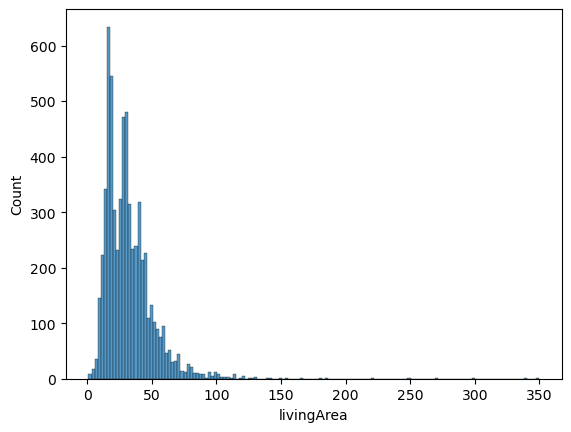

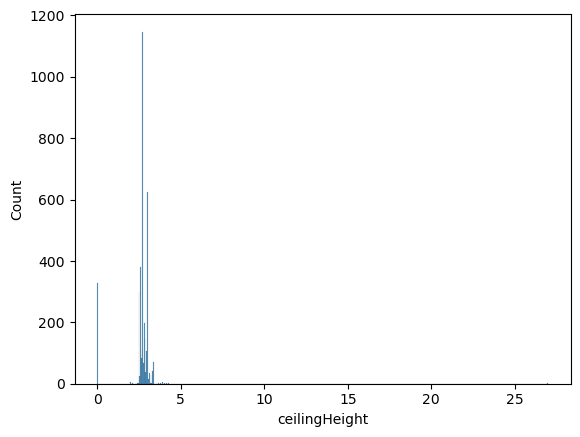

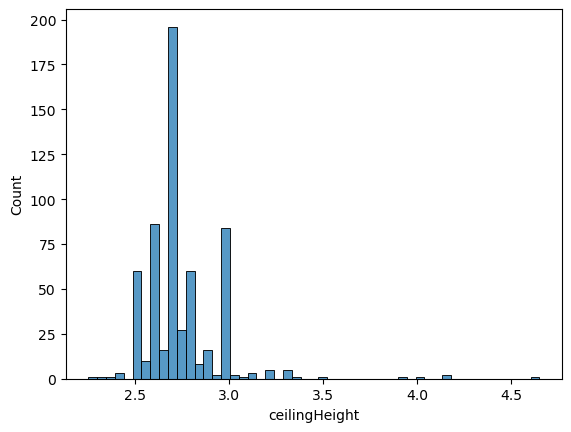

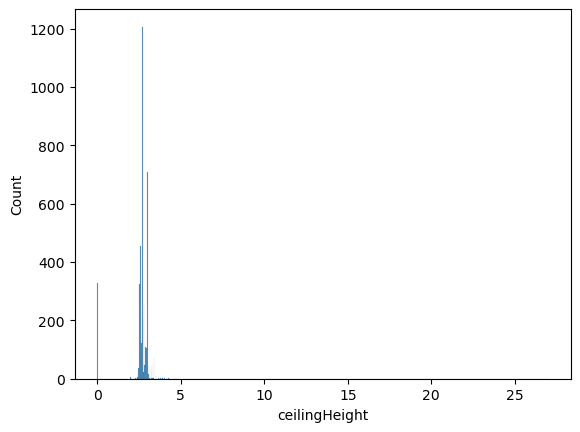

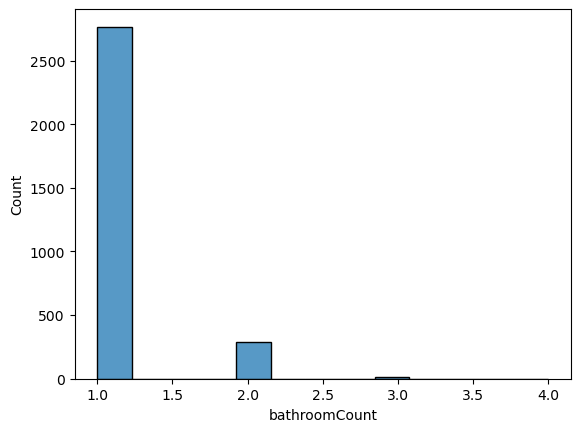

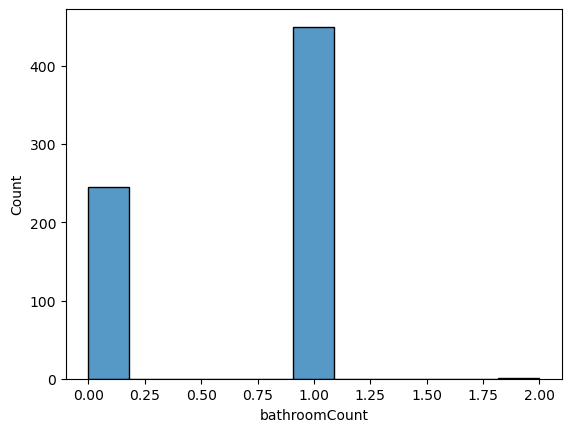

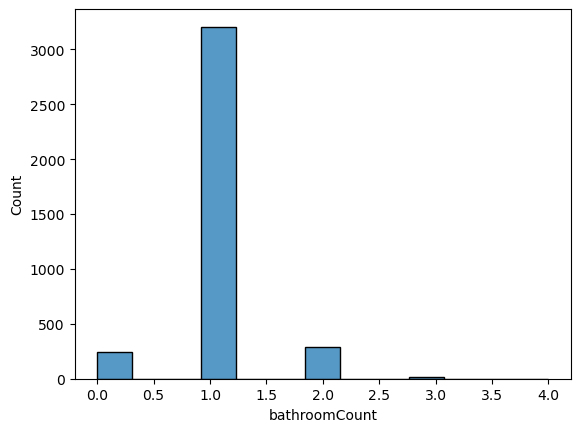

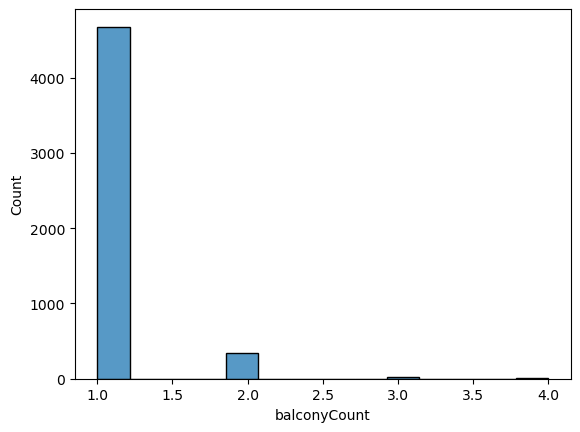

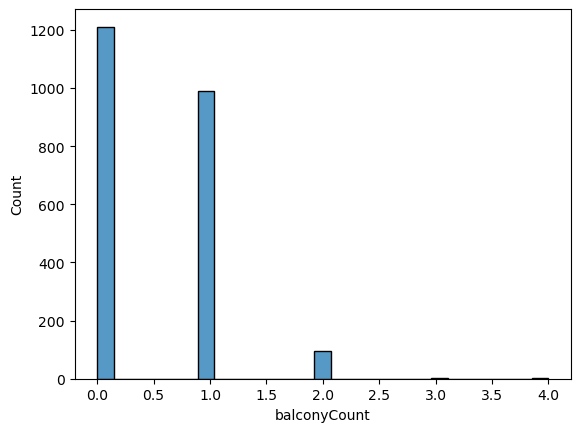

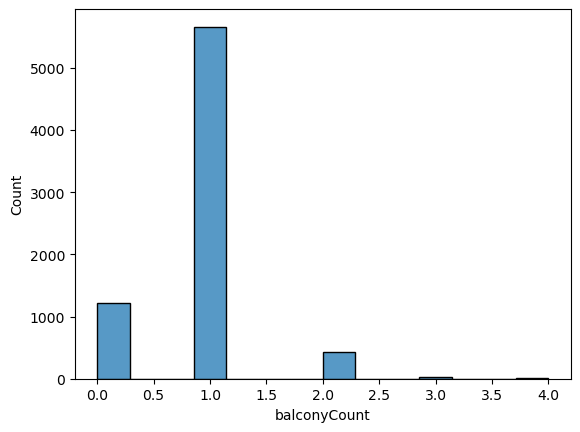

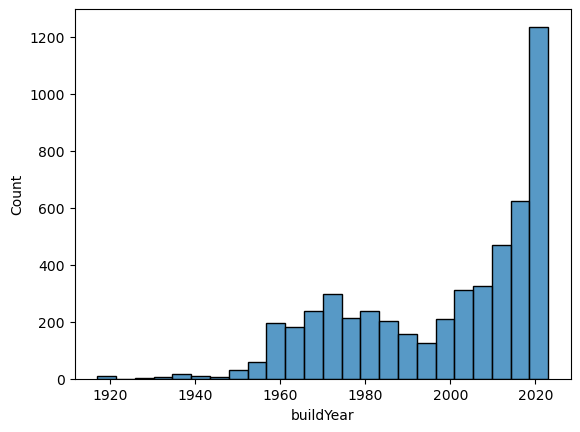

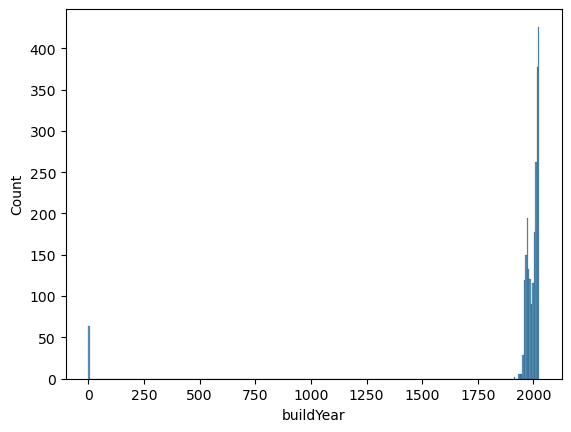

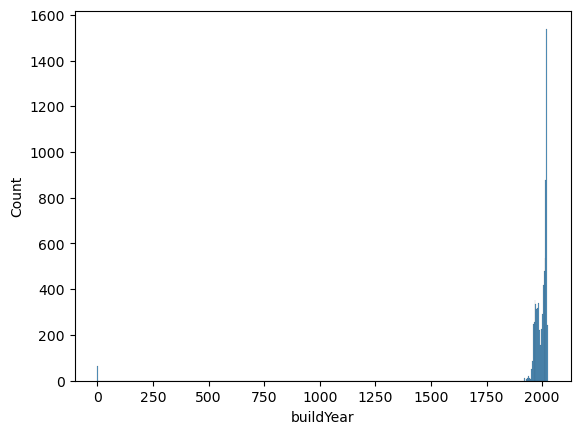

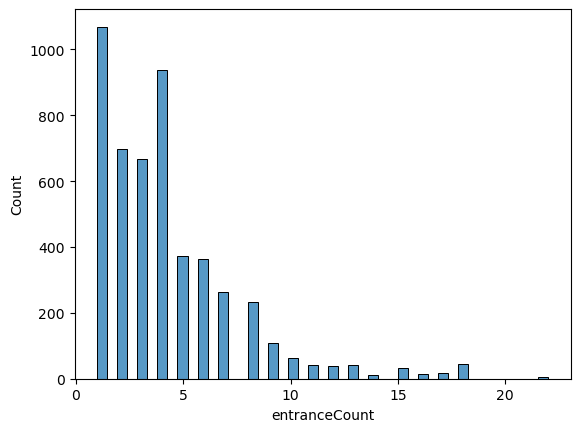

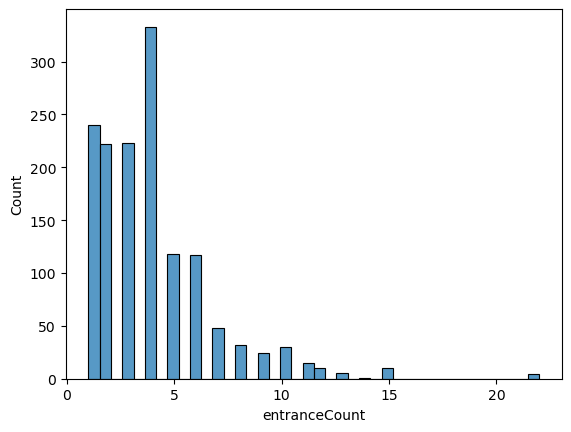

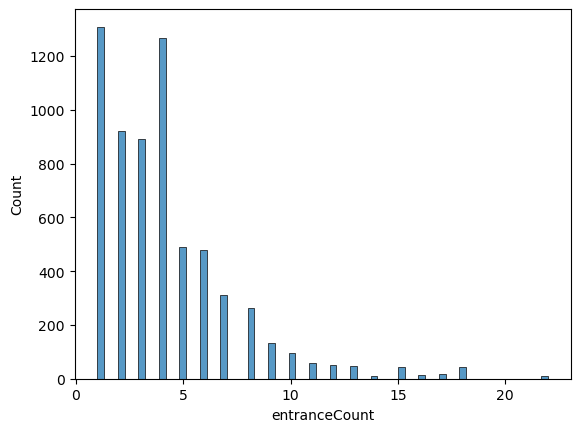

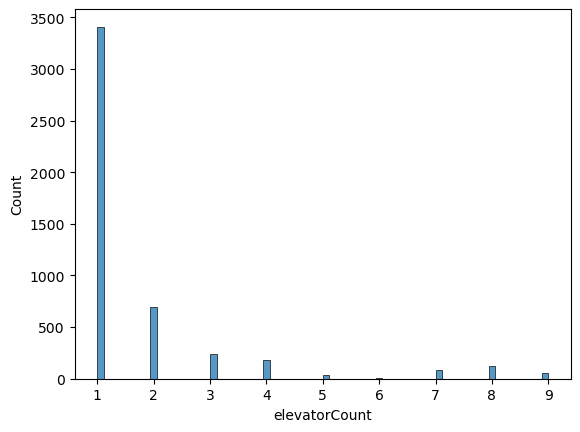

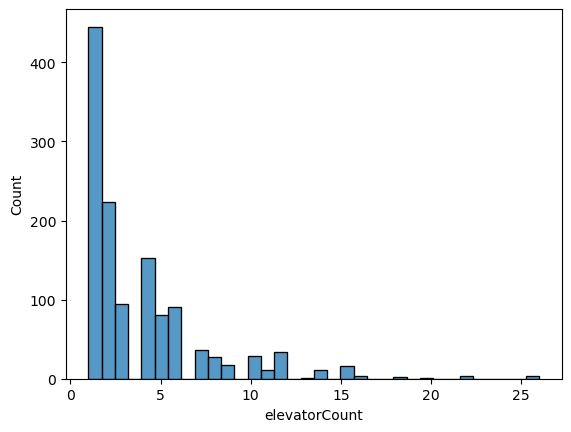

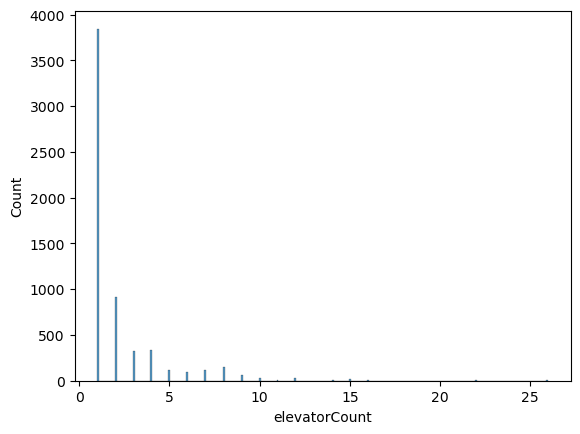

<Figure size 640x480 with 0 Axes>

In [281]:
for col in num_cols_cf:
    sns.histplot(data = merge_cian, x = col)
    plt.figure()
    sns.histplot(data = merge_domclick, x = col)
    plt.figure()
    sns.histplot(data = df_combined, x = col)
    plt.figure()

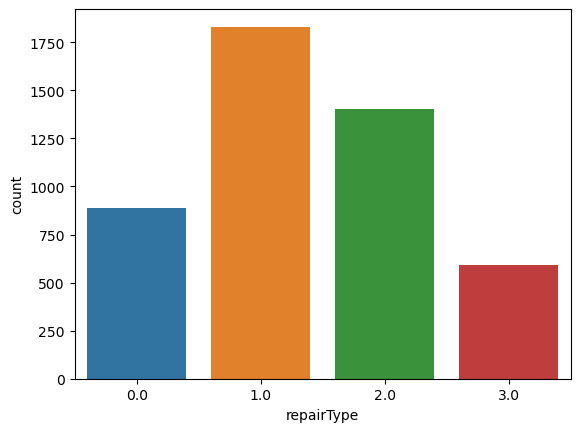

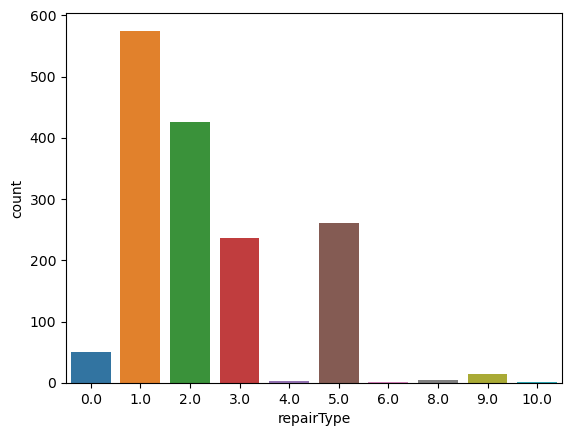

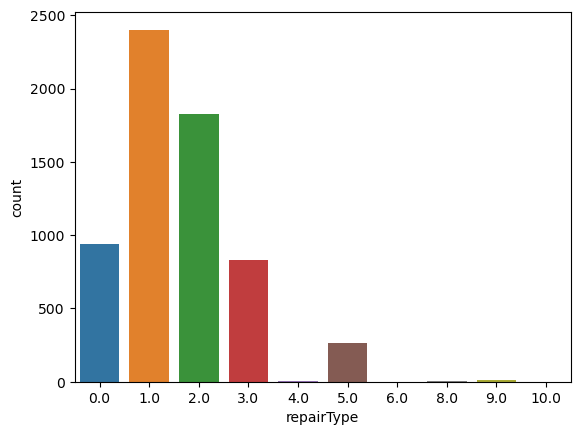

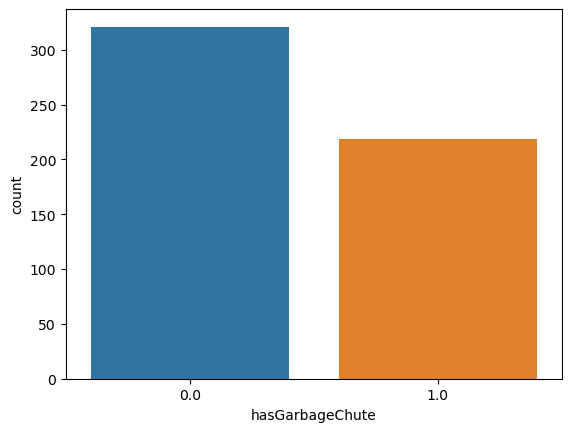

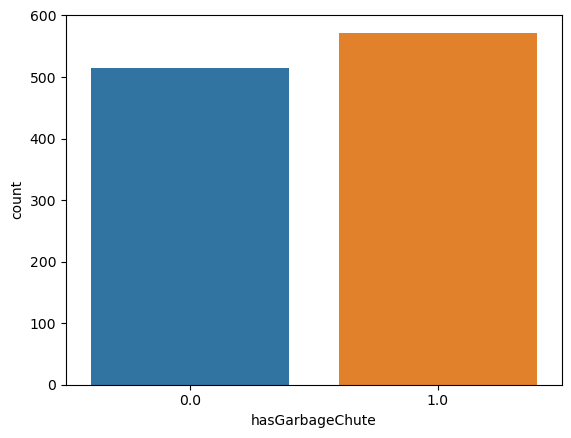

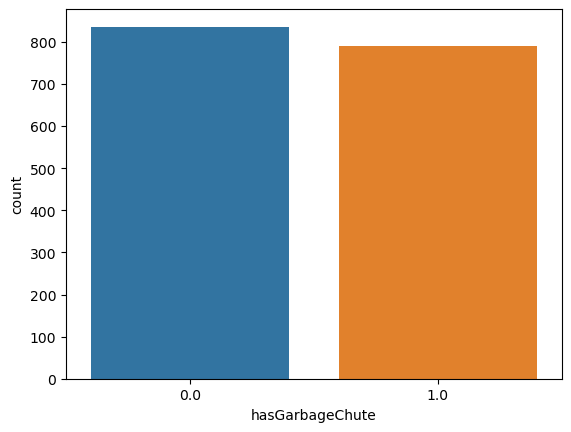

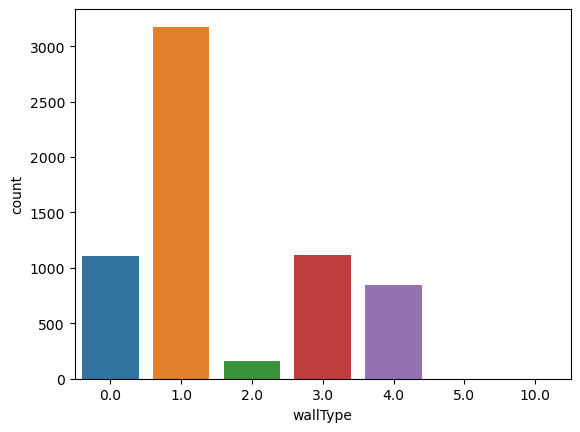

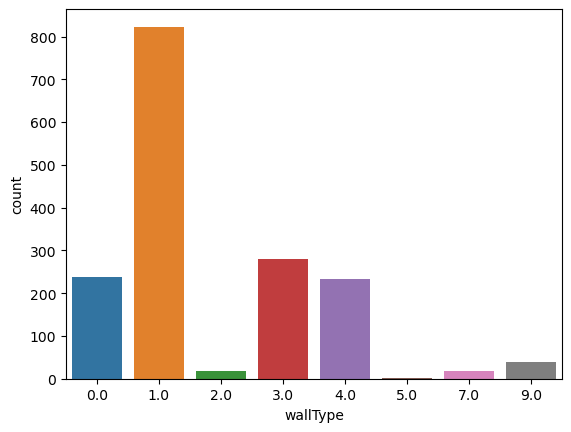

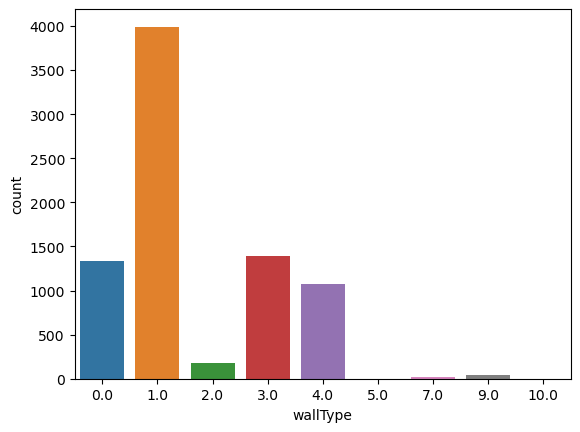

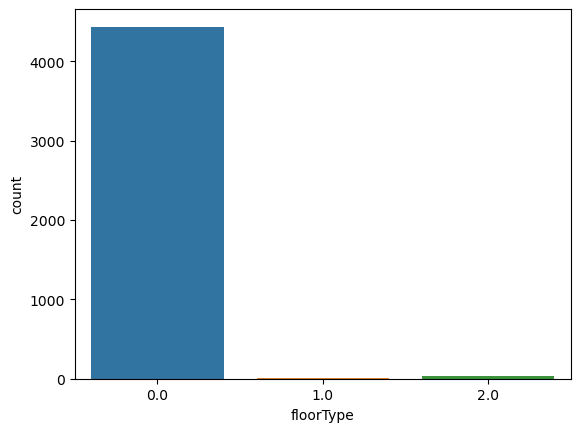

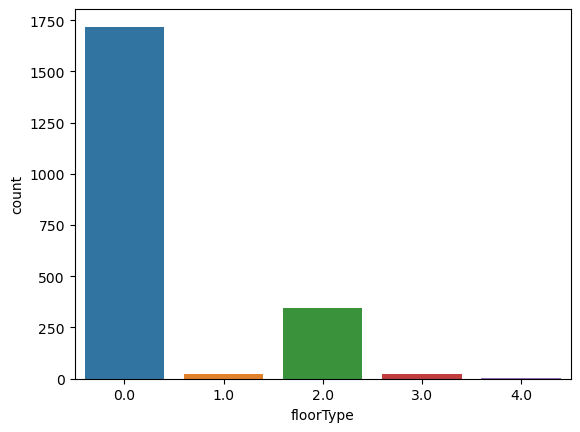

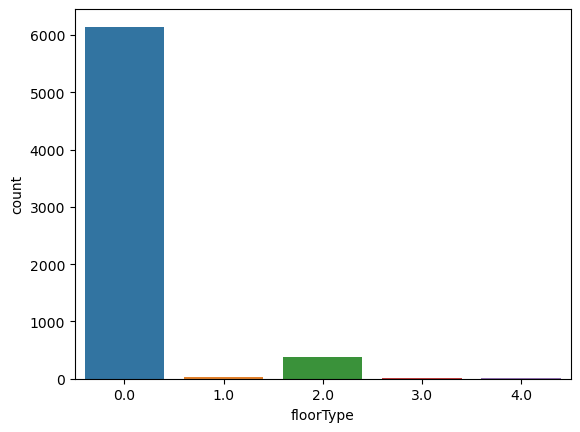

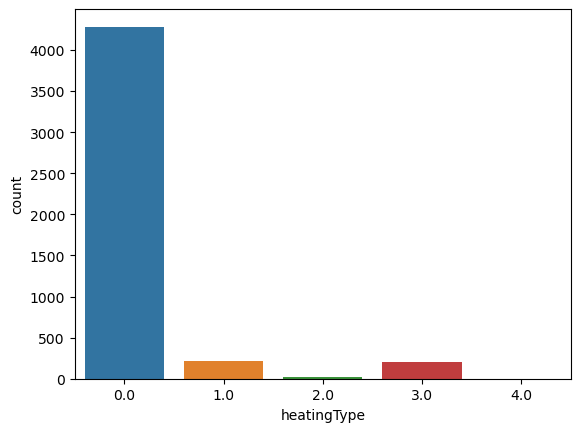

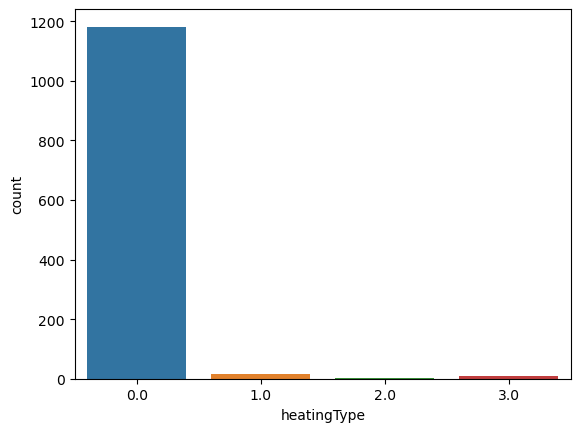

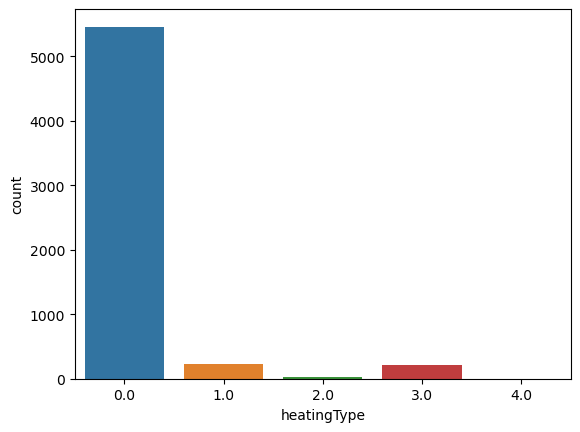

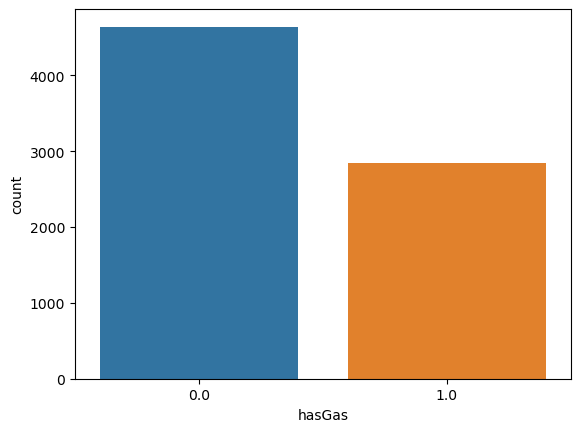

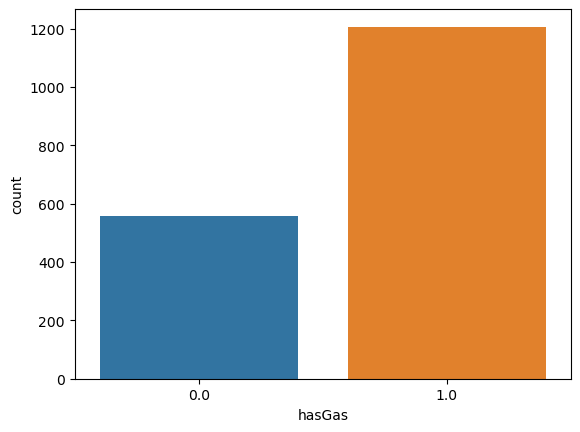

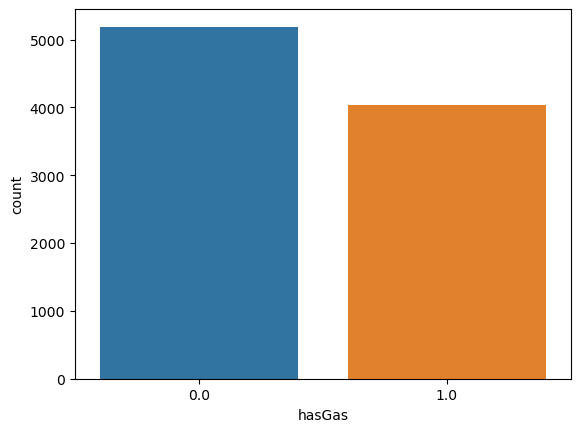

<Figure size 640x480 with 0 Axes>

In [282]:
for col in cat_cols_cf:
    sns.countplot(data = merge_cian, x = col)
    plt.figure()
    sns.countplot(data = merge_domclick, x = col)
    plt.figure()
    sns.countplot(data = df_combined, x = col)
    plt.figure()

# Заполнение пропусков

In [283]:
from miceforest import ImputationKernel

domclick_mice_kernel = ImputationKernel(data = df_domclick_prepared, save_all_iterations = True, random_state = 123)
domclick_mice_kernel.mice(10)
domclick_imputation = domclick_mice_kernel.complete_data()

In [284]:
domclick_imputation.info()
domclick_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       2297 non-null   float64
 1   longitude                      2297 non-null   float64
 2   price                          2297 non-null   int64  
 3   house_floors                   2297 non-null   int64  
 4   house_buildYear                2297 non-null   float64
 5   house_ceilingHeight            2297 non-null   float64
 6   house_hasGarbageDisposer       2297 non-null   float64
 7   house_liftsFreight             2297 non-null   float64
 8   house_liftsPassenger           2297 non-null   float64
 9   house_wallType                 2297 non-null   float64
 10  house_areaNonResidential       2297 non-null   float64
 11  house_basementArea             2297 non-null   float64
 12  house_chuteCount               2297 non-null   f

,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaNonResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation
0,55.71143,49.18580,8390000,5,2014.00000,2.70000,0.00000,0.00000,0.00000,1.00000,190.70000,440.80000,3.00000,1.00000,1.00000,1.00000,2.00000,4.00000,2.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1,41.60000,12.30000,18.00000,3,1.00000,0.00000,0,1.00000,2.00000
1,55.78034,49.18450,6900000,20,2023.00000,2.70000,0.00000,0.00000,3.00000,4.00000,2988.40000,8553.00000,1.00000,1.00000,4.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,4.00000,0.00000,893.00000,0.00000,1.00000,2.00000,1,35.00000,12.00000,13.00000,17,1.00000,0.00000,1,0.00000,0.00000
2,55.75443,49.19347,8700000,9,2001.00000,2.80000,1.00000,0.00000,2.00000,1.00000,2412.40000,1200.00000,3.00000,1.00000,1.00000,1.00000,3.00000,7.00000,3.00000,1.00000,0.00000,4.00000,0.00000,400.00000,0.00000,1.00000,2.00000,1,47.00000,9.00000,24.00000,9,0.00000,1.00000,1,1.00000,1.00000
3,55.68091,49.20004,5040000,20,2021.00000,2.70000,0.00000,0.00000,1.00000,2.00000,3604.57000,8260.00000,3.00000,1.00000,4.00000,1.00000,1.00000,1.00000,2.00000,0.00000,0.00000,5.00000,0.00000,0.00000,21.00000,1.00000,2.00000,1,39.10000,12.30000,14.00000,4,1.00000,0.00000,1,0.00000,1.00000
4,55.71191,49.18455,10500000,6,2013.00000,2.70000,0.00000,0.00000,0.00000,1.00000,1967.00000,19445.00000,13.00000,1.00000,2.00000,1.00000,4.00000,1.00000,6.00000,0.00000,0.00000,4.00000,0.00000,0.00000,0.00000,1.00000,0.00000,2,73.30000,12.00000,40.00000,5,1.00000,1.00000,0,1.00000,1.00000


In [285]:
cian_mice_kernel = ImputationKernel(data = df_cian_prepared, save_all_iterations = True, random_state = 123)
cian_mice_kernel.mice(10)
cian_imputation = cian_mice_kernel.complete_data()

In [286]:
cian_imputation.info()
cian_imputation.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7483 entries, 0 to 12659
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                7483 non-null   int64  
 1   price_for_metr       7483 non-null   int64  
 2   floor_object         7483 non-null   int64  
 3   total_floors         7483 non-null   int64  
 4   type_of_home         7483 non-null   float64
 5   square_home          7483 non-null   float64
 6   live_square          7483 non-null   float64
 7   kitchen_square       7483 non-null   float64
 8   height_ceiling       7483 non-null   float64
 9   bathroom             7483 non-null   float64
 10  balcony              7483 non-null   float64
 11  repair               7483 non-null   float64
 12  yer_home             7483 non-null   float64
 13  garbage_chute        7483 non-null   float64
 14  type_home            7483 non-null   float64
 15  type_of_overlap      7483 non-null   float

,price,price_for_metr,floor_object,total_floors,type_of_home,square_home,live_square,kitchen_square,height_ceiling,bathroom,balcony,repair,yer_home,garbage_chute,type_home,type_of_overlap,entrances,heating,gas_supply,finishing,number_of_elevators,room_count
0,1100000,88710,5,5,0.00000,12.40000,4.70000,3.00000,3.00000,1.00000,1.00000,1.00000,1963.00000,0.00000,1.00000,0.00000,3.00000,0.00000,1.00000,1.00000,1.00000,0
1,1570000,127642,3,5,0.00000,12.30000,4.30000,3.00000,2.60000,1.00000,1.00000,1.00000,1963.00000,0.00000,1.00000,0.00000,3.00000,0.00000,1.00000,2.00000,1.00000,0
2,1550000,77500,3,3,0.00000,20.00000,11.00000,4.00000,0.00000,1.00000,1.00000,0.00000,1957.00000,0.00000,1.00000,0.00000,3.00000,0.00000,1.00000,2.00000,1.00000,1
3,1400000,67961,1,3,0.00000,20.60000,10.60000,5.00000,0.00000,1.00000,1.00000,2.00000,1967.00000,0.00000,5.00000,0.00000,2.00000,0.00000,0.00000,2.00000,1.00000,1
4,1499000,128120,2,2,0.00000,11.70000,1.70000,5.00000,0.00000,1.00000,1.00000,0.00000,1932.00000,0.00000,1.00000,2.00000,3.00000,0.00000,1.00000,2.00000,1.00000,1


In [287]:
combined_mice_kernel = ImputationKernel(data = df_combined, save_all_iterations = True, random_state = 123)
combined_mice_kernel.mice(10)
combined_imputation = combined_mice_kernel.complete_data()

In [288]:
combined_imputation.info()
combined_imputation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            9760 non-null   int64  
 1   room_count       9760 non-null   int64  
 2   floor            9760 non-null   int64  
 3   totalFloors      9760 non-null   int64  
 4   area             9760 non-null   float64
 5   kitchenArea      9760 non-null   float64
 6   livingArea       9760 non-null   float64
 7   ceilingHeight    9760 non-null   float64
 8   bathroomCount    9760 non-null   float64
 9   balconyCount     9760 non-null   float64
 10  repairType       9760 non-null   float64
 11  buildYear        9760 non-null   float64
 12  hasGarbageChute  9760 non-null   float64
 13  wallType         9760 non-null   float64
 14  floorType        9760 non-null   float64
 15  entranceCount    9760 non-null   float64
 16  heatingType      9760 non-null   float64
 17  hasGas        

,price,room_count,floor,totalFloors,area,kitchenArea,livingArea,ceilingHeight,bathroomCount,balconyCount,repairType,buildYear,hasGarbageChute,wallType,floorType,entranceCount,heatingType,hasGas,elevatorCount
0,8390000,1,3,5,41.60000,12.30000,15.00000,2.70000,0.00000,0.00000,2.00000,2014.00000,0.00000,1.00000,0.00000,2.00000,0.00000,1.00000,2.00000
1,6900000,1,17,20,35.00000,12.00000,13.00000,2.70000,0.00000,1.00000,0.00000,2023.00000,0.00000,4.00000,0.00000,1.00000,0.00000,0.00000,4.00000
2,8700000,1,9,9,47.00000,9.00000,24.00000,2.80000,1.00000,1.00000,1.00000,2001.00000,1.00000,1.00000,0.00000,3.00000,0.00000,1.00000,3.00000
3,5040000,1,4,20,39.10000,12.30000,17.00000,0.00000,1.00000,1.00000,0.00000,2021.00000,0.00000,2.00000,0.00000,1.00000,0.00000,0.00000,1.00000
4,10500000,2,5,6,73.30000,12.00000,45.10000,2.70000,1.00000,0.00000,1.00000,2013.00000,0.00000,1.00000,0.00000,4.00000,0.00000,1.00000,1.00000


In [289]:
combined_imputation['heatingType'].unique()

array([0., 3., 2., 1., 4.])

In [290]:
combined_imputation['repairType'].unique()

array([ 2.,  0.,  1.,  5.,  3.,  8.,  6.,  9., 10.,  4.])

# Сравнение моделей машинного обучения

## Разбиение данных

In [291]:
X_domclick = domclick_imputation.drop(['price'], axis=1).values
Y_domclick = domclick_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_domclick, X_test_domclick, y_train_domclick, y_test_domclick = train_test_split(X_domclick, Y_domclick, test_size=test_size, random_state=r_state)

In [292]:
X_cian = cian_imputation.drop(['price'], axis=1).values
Y_cian = cian_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_cian, X_test_cian, y_train_cian, y_test_cian = train_test_split(X_cian, Y_cian, test_size=test_size, random_state=r_state)

In [293]:
X_combined = combined_imputation.drop(['price'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

## Линейная регрессия

In [294]:
linear_regressor_domclick = LinearRegression()
linear_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = linear_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  49831157470595.695
MAE:  2534943.8465307406
RMSE:  7059118.746033084
R2:  0.6928654863506296


In [295]:
linear_regressor_cian = LinearRegression()
linear_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = linear_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  4684556006116.615
MAE:  1194246.3615252483
RMSE:  2164383.5164121483
R2:  0.9082944262132605


In [296]:
linear_regressor_combined = LinearRegression()
linear_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = linear_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  22088894917684.01
MAE:  2619529.8985831277
RMSE:  4699882.436581154
R2:  0.6320373253425619


## Случайный лес

In [297]:
rf_regressor_domclick = RandomForestRegressor()
rf_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = rf_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  56588814239677.83
MAE:  1916477.5018593373
RMSE:  7522553.704672226
R2:  0.6512146451794982


In [298]:
rf_regressor_cian = RandomForestRegressor()
rf_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = rf_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  793855361120.3036
MAE:  150914.36084523174
RMSE:  890985.6121847891
R2:  0.9844593679101796


In [299]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  14530889172028.275
MAE:  1816680.4710602656
RMSE:  3811940.342139194
R2:  0.7579405911968122


## Дерево решений

In [300]:
tree_regressor_domclick = DecisionTreeRegressor()
tree_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = tree_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  89635227497235.8
MAE:  2484184.565217391
RMSE:  9467588.261919495
R2:  0.44753296129115405


In [301]:
tree_regressor_cian = DecisionTreeRegressor()
tree_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = tree_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  2188968029558.566
MAE:  344854.49866381614
RMSE:  1479516.1471097793
R2:  0.9571484322336224


In [302]:
tree_regressor_combined = DecisionTreeRegressor()
tree_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = tree_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  27338059772831.402
MAE:  2456554.4704918033
RMSE:  5228581.04774435
R2:  0.5445953438846514


## Метод k-ближайших соседей

In [303]:
knn_regressor_domclick = KNeighborsRegressor()
knn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = knn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  139095283046990.39
MAE:  4003187.694260869
RMSE:  11793866.33157212
R2:  0.14268573563101272


In [304]:
knn_regressor_cian = KNeighborsRegressor()
knn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = knn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  27322962431985.727
MAE:  3374235.4231961514
RMSE:  5227137.116241138
R2:  0.46512157307818847


In [305]:
knn_regressor_combined = KNeighborsRegressor()
knn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = knn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  22783103895498.742
MAE:  2343387.2488524592
RMSE:  4773164.976773665
R2:  0.6204730079242464


## Перцептрон

In [309]:
nn_regressor_domclick = MLPRegressor()
nn_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = nn_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  208400921758147.78
MAE:  6942258.955635376
RMSE:  14436097.871590778
R2:  -0.2844798113717999


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [310]:
nn_regressor_cian = MLPRegressor()
nn_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = nn_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  32206831020696.32
MAE:  3979179.6023867154
RMSE:  5675106.256335323
R2:  0.3695142261616513


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [311]:
nn_regressor_combined = MLPRegressor()
nn_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = nn_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  61032372696048.31
MAE:  4418962.525893506
RMSE:  7812321.850515909
R2:  -0.016693464368302102


C:\Users\shadee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## XGBoost

In [312]:
xgb_regressor_domclick = XGBRegressor()
xgb_regressor_domclick.fit(X_train_domclick, y_train_domclick)
probs_domclick = xgb_regressor_domclick.predict(X_test_domclick)
print('MSE: ', mean_squared_error(y_test_domclick, probs_domclick))
print('MAE: ', mean_absolute_error(y_test_domclick, probs_domclick))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_domclick, probs_domclick)))
print('R2: ', r2_score(y_test_domclick, probs_domclick))

MSE:  59079355639573.05
MAE:  1817605.085652174
RMSE:  7686309.624232753
R2:  0.6358641845358375


In [313]:
xgb_regressor_cian = XGBRegressor()
xgb_regressor_cian.fit(X_train_cian, y_train_cian)
probs_cian = xgb_regressor_cian.predict(X_test_cian)
print('MSE: ', mean_squared_error(y_test_cian, probs_cian))
print('MAE: ', mean_absolute_error(y_test_cian, probs_cian))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_cian, probs_cian)))
print('R2: ', r2_score(y_test_cian, probs_cian))

MSE:  665519584509.4746
MAE:  233229.3854222341
RMSE:  815793.8370136628
R2:  0.9869716883982037


In [314]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  15150475596048.537
MAE:  1806856.5403688524
RMSE:  3892361.185199613
R2:  0.7476193560868831


# Сохранить модель

In [315]:
combined_imputation.to_csv('datasets_18features/combined_kazan_18feature.csv', index=False)

In [316]:
import pickle

rf_pkl_file = "models_18features/rf_model_kazan_18features.pkl"
xgboost_pkl_file = "models_18features/xgboost_model_kazan_18features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [317]:
X_combined = combined_imputation.drop(['price', 'hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1).values
Y_combined = combined_imputation['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [318]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  16490570470173.98
MAE:  1916314.6328827185
RMSE:  4060858.3415546496
R2:  0.7252956999684801


In [319]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  14921837223666.324
MAE:  1899535.2275614755
RMSE:  3862879.3954337123
R2:  0.7514280747821642


In [320]:
combined_imputation10 = combined_imputation.drop(['hasGarbageChute', 'balconyCount', 'elevatorCount', 'hasGas', 'bathroomCount', 
                                       'entranceCount', 'wallType', 'floorType'], axis=1)
combined_imputation10.to_csv('datasets_10features/combined_kazan_10feature.csv', index=False)

In [321]:
rf_pkl_file = "models_10features/rf_model_kazan_10features.pkl"
xgboost_pkl_file = "models_10features/xgboost_model_kazan_10features.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

# One Hot Encoding

In [322]:
combined_ohe = pd.get_dummies(combined_imputation, columns = cat_cols_cf)
combined_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                9760 non-null   int64  
 1   room_count           9760 non-null   int64  
 2   floor                9760 non-null   int64  
 3   totalFloors          9760 non-null   int64  
 4   area                 9760 non-null   float64
 5   kitchenArea          9760 non-null   float64
 6   livingArea           9760 non-null   float64
 7   ceilingHeight        9760 non-null   float64
 8   bathroomCount        9760 non-null   float64
 9   balconyCount         9760 non-null   float64
 10  buildYear            9760 non-null   float64
 11  entranceCount        9760 non-null   float64
 12  elevatorCount        9760 non-null   float64
 13  repairType_0.0       9760 non-null   bool   
 14  repairType_1.0       9760 non-null   bool   
 15  repairType_2.0       9760 non-null   b

In [323]:
combined_ohe.to_csv('datasets_18features_ohe/combined_kazan_18feature_ohe.csv', index=False)

In [324]:
X_combined = combined_ohe.drop(['price'], axis=1).values
Y_combined = combined_ohe['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [325]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  15088742725618.357
MAE:  1825376.498595555
RMSE:  3884423.087875258
R2:  0.7486477186284417


In [326]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  12914099081786.484
MAE:  1754778.5489241802
RMSE:  3593619.2176949526
R2:  0.7848735096692854


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_features = ['auto', 'sqrt']

min_samples_split = [2, 5, 10, 15, 20, 25, 30]

min_samples_leaf = [1, 2, 4, 6, 8, 10, 15, 20, 25, 30]
params = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}
model = RandomizedSearchCV(estimator = rf_regressor_combined, 
                   param_distributions = params, 
                   cv = 5, n_iter = 500)
                   
model.fit(X_train_combined, y_train_combined)

In [327]:
rf_pkl_file = "models_18features_ohe/rf_model_kazan_18features_ohe.pkl"
xgboost_pkl_file = "models_18features_ohe/xgboost_model_kazan_18features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)

In [328]:
cat_cols_ohe = [ele for ele in cat_cols_cf if ele not in ('hasGarbageChute', 'wallType', 'floorType', 'hasGas')]
combined_ohe_dropped = pd.get_dummies(combined_imputation10, columns = cat_cols_ohe)
combined_ohe_dropped.to_csv('datasets_10features_ohe/combined_kazan_10feature_ohe.csv', index=False)
combined_ohe_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            9760 non-null   int64  
 1   room_count       9760 non-null   int64  
 2   floor            9760 non-null   int64  
 3   totalFloors      9760 non-null   int64  
 4   area             9760 non-null   float64
 5   kitchenArea      9760 non-null   float64
 6   livingArea       9760 non-null   float64
 7   ceilingHeight    9760 non-null   float64
 8   buildYear        9760 non-null   float64
 9   repairType_0.0   9760 non-null   bool   
 10  repairType_1.0   9760 non-null   bool   
 11  repairType_2.0   9760 non-null   bool   
 12  repairType_3.0   9760 non-null   bool   
 13  repairType_4.0   9760 non-null   bool   
 14  repairType_5.0   9760 non-null   bool   
 15  repairType_6.0   9760 non-null   bool   
 16  repairType_8.0   9760 non-null   bool   
 17  repairType_9.0

In [329]:
X_combined = combined_ohe_dropped.drop(['price'], axis=1).values
Y_combined = combined_ohe_dropped['price'].values

test_size = 0.25
r_state = 123
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, Y_combined, test_size=test_size, random_state=r_state)

In [330]:
rf_regressor_combined = RandomForestRegressor()
rf_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = rf_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  16352864199067.547
MAE:  1900917.8854982532
RMSE:  4043867.480403821
R2:  0.7275896475843411


In [331]:
xgb_regressor_combined = XGBRegressor()
xgb_regressor_combined.fit(X_train_combined, y_train_combined)
probs_combined = xgb_regressor_combined.predict(X_test_combined)
print('MSE: ', mean_squared_error(y_test_combined, probs_combined))
print('MAE: ', mean_absolute_error(y_test_combined, probs_combined))
print('RMSE: ', math.sqrt(mean_squared_error(y_test_combined, probs_combined)))
print('R2: ', r2_score(y_test_combined, probs_combined))

MSE:  15111511813786.74
MAE:  1862663.558043033
RMSE:  3887352.802844982
R2:  0.7482684251140685


In [332]:
rf_pkl_file = "models_10features_ohe/rf_model_kazan_10features_ohe.pkl"
xgboost_pkl_file = "models_10features_ohe/xgboost_model_kazan_10features_ohe.pkl"

with open(rf_pkl_file, 'wb') as file1:  
    pickle.dump(rf_regressor_combined, file1)

with open(xgboost_pkl_file, 'wb') as file2:  
    pickle.dump(xgb_regressor_combined, file2)